<a href="https://colab.research.google.com/github/snehalgaddime/NYC-Taxi-Time-Prediction-ML/blob/main/NYC_Project_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing the Dataset
df=pd.read_csv("/content/NYC Taxi Data.csv")

In [ ]:
#Importing the Dataset
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

### Dataset Rows & Columns count

In [ ]:
# finding no of rows and no of columns in data set
print('no of rows:',df.shape[0])
print('no of columns:',df.shape[1])

no of rows: 1458644
no of columns: 11


### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


By this operation we know that there is no missing value in our data set.Almost all data type is in their proper fotmat only pickup_date time and dropoff date time in string format which we have to change in their correct format.

### Duplicate Values

In [ ]:
# make a function to check null values and unique values.
def information():
 x=pd.DataFrame(index=df.columns)
 x["data type"]=df.dtypes
 x["null values"]=df.isnull().sum()
 x["unique values"]=df.nunique()
 return x


In [ ]:
information()

data type  null values  unique values
id                    object            0        1458644
vendor_id              int64            0              2
pickup_datetime       object            0        1380222
dropoff_datetime      object            0        1380377
passenger_count        int64            0             10
pickup_longitude     float64            0          23047
pickup_latitude      float64            0          45245
dropoff_longitude    float64            0          33821
dropoff_latitude     float64            0          62519
store_and_fwd_flag    object            0              2
trip_duration          int64            0           7417

by above we can see that there is no null value in our data set.

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

Some insights from the above summary:

1. Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

2. Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

### Changing DataTypes

In [ ]:
import pandas as pd
import numpy as np

# Define a function to safely convert the date string to datetime
def safe_to_datetime(date_string):
    try:
        return pd.to_datetime(date_string, format="%Y-%m-%d %H:%M:%S")
    except (ValueError, TypeError):
        return pd.NaT  # Return 'NaT' for invalid or missing values

# Apply the function to the DataFrame column
df["dropoff_datetime"] = df["dropoff_datetime"].apply(safe_to_datetime)


In [ ]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

In [ ]:
df["dropoff_datetime"].dtypes

dtype('<M8[ns]')

In [ ]:
# finding pickup and drop month
df["pickup_month"]=df["pickup_datetime"].dt.month
df["dropoff_month"]=df["dropoff_datetime"].dt.month

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#finding pickup and drop
df["pickup_date"]=df["pickup_datetime"].dt.day
df["dropoff_date"]=df["dropoff_datetime"].dt.day

In [ ]:
# Creating pickup and dropoff weekdays
df['pickup_weekday'] =df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday


In [ ]:
# Creating pickup and dropoff hours
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] =df['dropoff_datetime'].dt.hour

In [ ]:
#creating pickup and dropoff day name
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [ ]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  ...  pickup_month  dropoff_month  \
0         40.765602                  N  ...             3              3   
1         40.731152                  N  ...             6              6   
2         40.710087                  N  ...             1              1   
3         40.706718                  N  ...             4              4   
4         40.782520                  N  ...             3              3   

   pickup_date  dropoff_date  pickup_weekday  dropoff_weekday  pickup_hour  \
0           14            14               0                0           17   
1           12            12               6                6            0   
2           19            19               1                1           11   
3            6             6               2                2           19   
4           26            26               5                5           13   

   dropoff_hour  pickup_day dropoff_day  
0            17      Monday      Monday  
1             0      Sunday      Sunday  
2            12     Tuesday     Tuesday  
3            19   Wednesday   Wednesday  
4            13    Saturday    Saturday  

[5 rows x 21 columns]

In [ ]:
# calculate trip duration in minute
df["trip_duration_in_minute"]=df["trip_duration"]/60

In [ ]:
import pandas as pd
from geopy.distance import great_circle

# Drop rows with NaN values in the specified columns
df = df.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

# Calculate the distance for the cleaned DataFrame
df['distance'] = df.apply(lambda row: great_circle((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'dropoff_month', 'pickup_date',
       'dropoff_date', 'pickup_weekday', 'dropoff_weekday', 'pickup_hour',
       'dropoff_hour', 'pickup_day', 'dropoff_day', 'trip_duration_in_minute',
       'distance'],
      dtype='object')

## Data Cleaning

In [ ]:
# Checking for duplicate rows
df.duplicated().sum()

0

No duplicated rows are there

In [ ]:
# Checking unique values
df.nunique()

id                         1458644
vendor_id                        2
pickup_datetime            1380222
dropoff_datetime           1380377
passenger_count                 10
pickup_longitude             23047
pickup_latitude              45245
dropoff_longitude            33821
dropoff_latitude             62519
store_and_fwd_flag               2
trip_duration                 7417
pickup_month                     6
dropoff_month                    7
pickup_date                     31
dropoff_date                    31
pickup_weekday                   7
dropoff_weekday                  7
pickup_hour                     24
dropoff_hour                    24
pickup_day                       7
dropoff_day                      7
trip_duration_in_minute       7417
distance                   1452360
dtype: int64

In [ ]:
# Checking for null values
df.isnull().sum()

id                         0
vendor_id                  0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
store_and_fwd_flag         0
trip_duration              0
pickup_month               0
dropoff_month              0
pickup_date                0
dropoff_date               0
pickup_weekday             0
dropoff_weekday            0
pickup_hour                0
dropoff_hour               0
pickup_day                 0
dropoff_day                0
trip_duration_in_minute    0
distance                   0
dtype: int64

There are no null values are present in the data

##  Data Vizualization

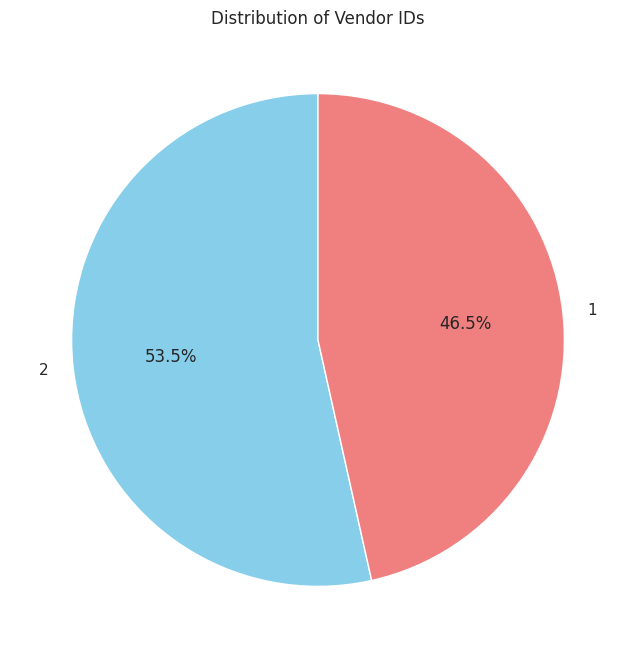

In [ ]:
vendor_counts = df['vendor_id'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Vendor IDs')
plt.show()

 - We can observe that vendor 2 has a higher number of bookings (53%).


In [ ]:
df["store_and_fwd_flag"].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

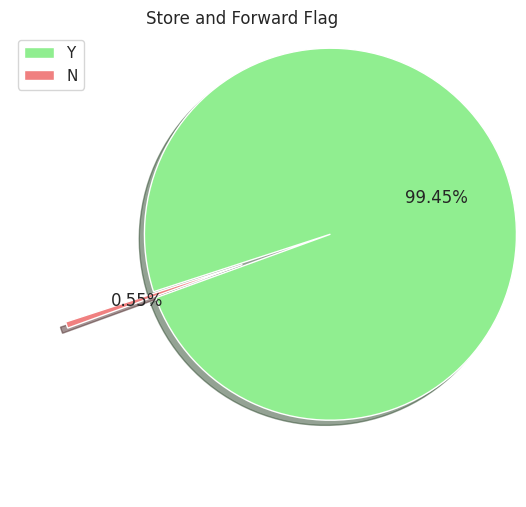

In [ ]:
#Store & Forward flag
plt.figure(figsize=(6,8))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

* We see there are less than 1% of trips that were stored before forwarding.

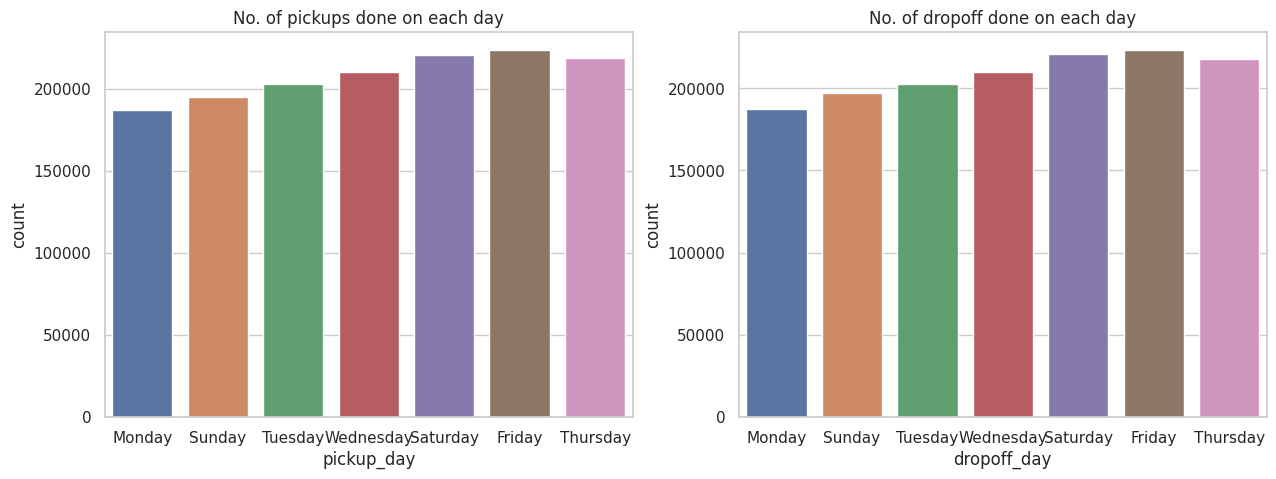

In [ ]:
##Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x="pickup_day",data=df,ax=ax[0])
ax[0].set_title('No. of pickups done on each day')
sns.countplot(x="dropoff_day",data=df,ax=ax[1])
ax[1].set_title('No. of dropoff done on each day')
plt.show()

Above plots interpret that in a week, "friday", and "saturday" have higher number of pickups and dropoffs.

We can see that compared to other days, taxi booking rates are higher on the weekends ( Friday and Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.

In [ ]:
# diving the time in to different timezone
def timezone(x):
  if x>=6 and x<10:
    return "morning"
  elif x>=10 and x<16:
    return "mid day"
  elif x>=16 and x<22:
    return "evevning"
  elif x>=22 or x<6:
    return "late night"

In [ ]:
#apply that function
df["pickup_time_zone"]=df.pickup_hour.apply(timezone)
df["dropoff_time_zone"]=df.dropoff_hour.apply(timezone)

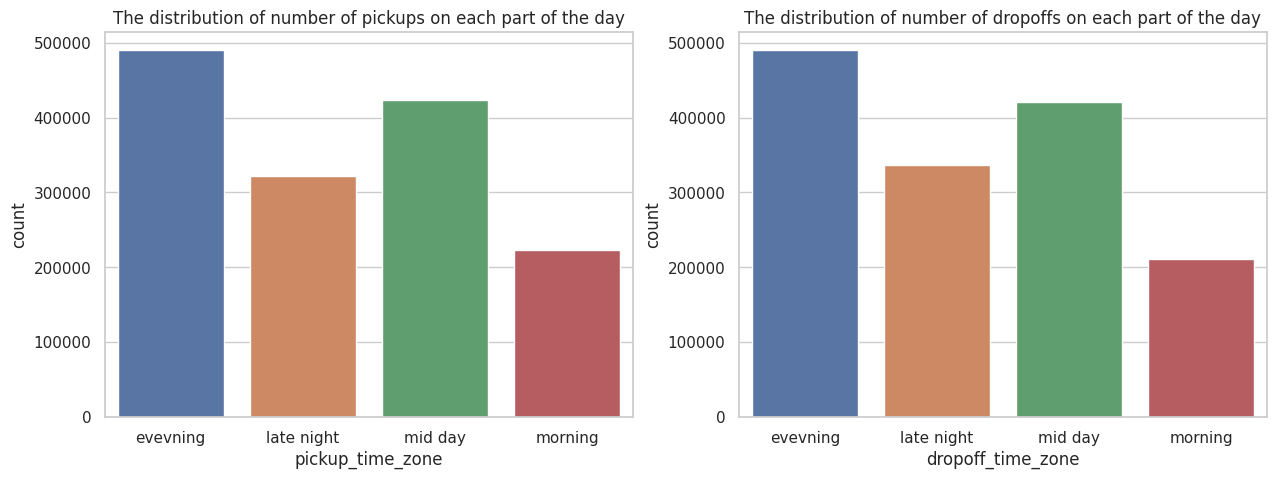

In [ ]:
# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_time_zone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_time_zone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

* we can see that evening is the busiet time of whole day. people take the taxi to come fro office and going for party at evening and dinner. after that at mid day maximum ride taken because people were going to office after 10 am.

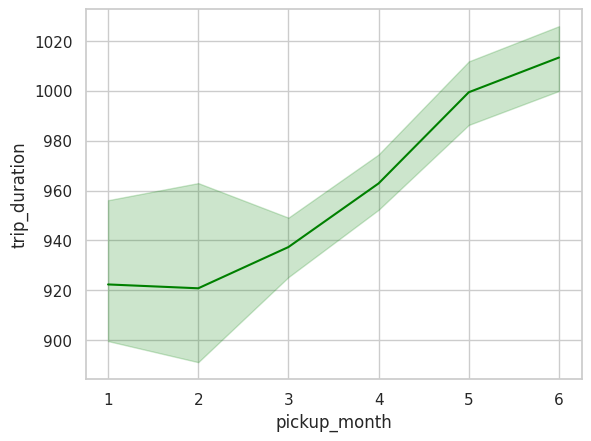

In [ ]:
#Trip Duration by the month.
sns.lineplot(x='pickup_month',y='trip_duration',data=df,color='green')
plt.show()

* From February, we can see trip duration rising every month.

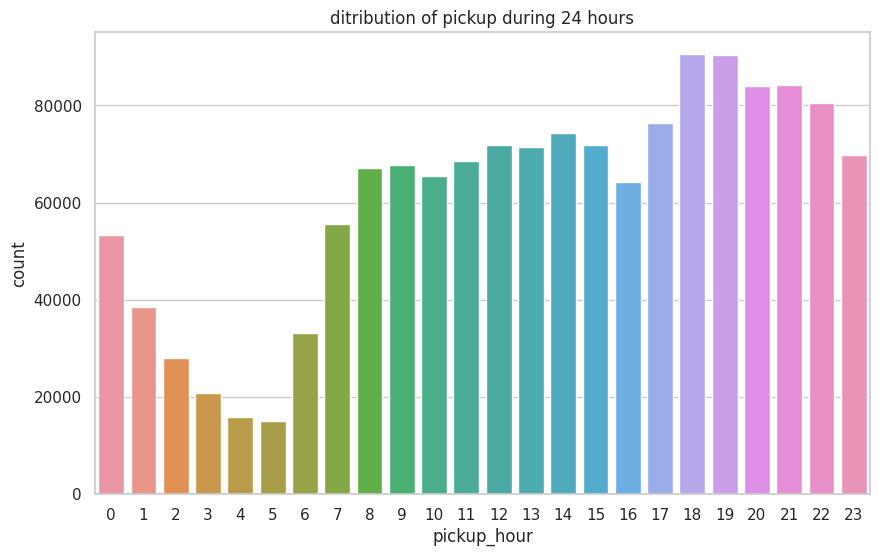

In [ ]:
# distribution of ride in complete 24 hours hourly basis
plt.figure(figsize=(10,6))
sns.countplot(x=df["pickup_hour"])
plt.title("ditribution of pickup during 24 hours")
plt.show()

* Distribution of pickup and dropoff hours follows same pattern, it shows that most of the pickups and dropoffs are in the evening. We can see that people often use taxi services to get to their workplaces in the mornings after 10:00 AM. and busiet time is 6PM to 7PM.

In [ ]:
#aggegate vendor id by pickup month
monthly_pickup_by_vendor=df.groupby(["pickup_month","vendor_id"]).size()
monthly_pickup_by_vendor = monthly_pickup_by_vendor.unstack()


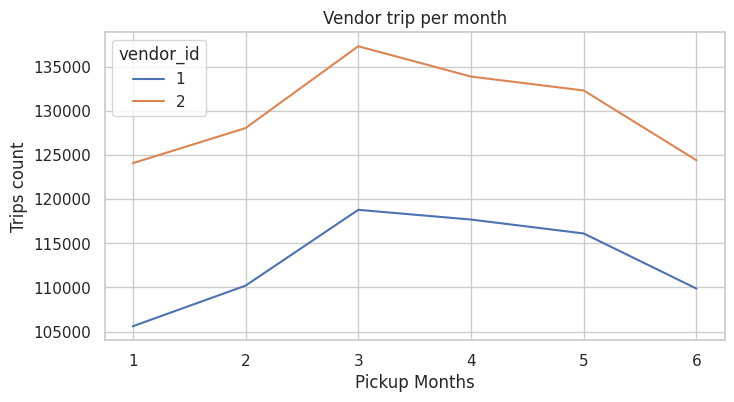

In [ ]:
monthly_pickup_by_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')
plt.show()

* We can see that both vendors' trips are at their maximum in the month of March and their lowest in the month of January, February, and after June.

In [ ]:
#Passenger Count
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

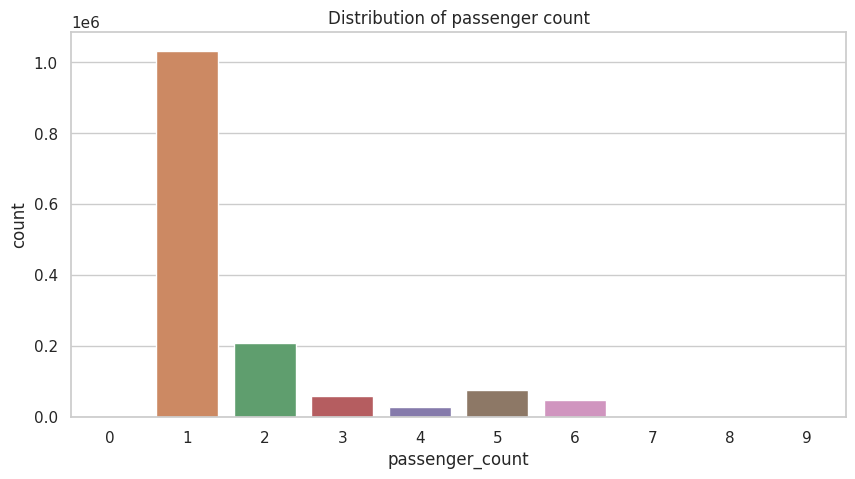

In [ ]:
# distribution of passenger
plt.figure(figsize=(10,5))
sns.countplot(x=df["passenger_count"])
plt.title('Distribution of passenger count')
plt.show()

* We can notice that most of the bookings are made by solo traveler.which means less number of people prefer car pool or may be less number of groups book car...people prefer to ride solo

In [ ]:
# divide trip duration in differnt bins
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']

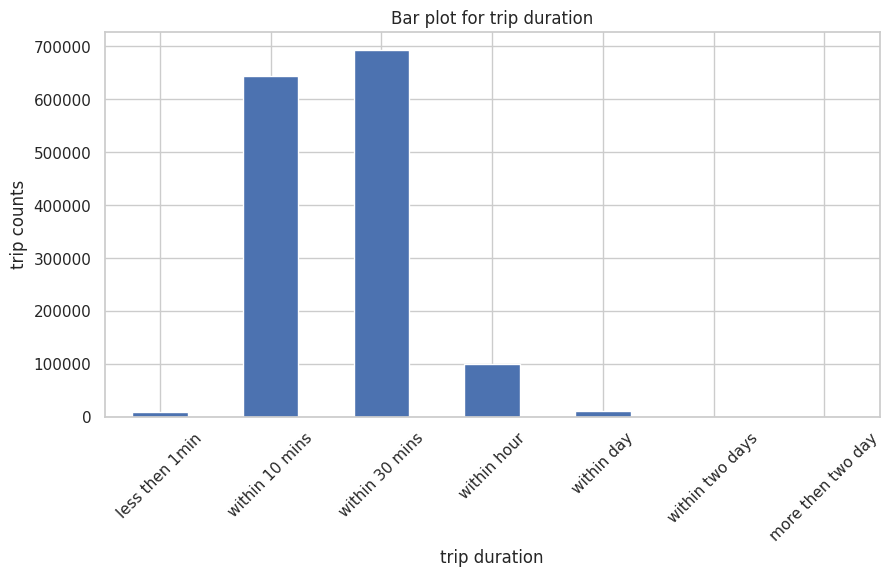

In [ ]:
plt.figure(figsize=[10,5])
df1=pd.cut(df['trip_duration_in_minute'],bins=[0,1,10,30,60,1440,1440*2,50000],labels=labels)
df.groupby(df1)['trip_duration_in_minute'].count().plot(kind='bar')
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.xlabel("trip duration")
plt.xticks(rotation=45)
plt.show()

* By above chart we can see that most of trip duration 10 to 30 minute. some trip also goes on hourly.long trip with in day very rare.

#distribution of differnt features

In [ ]:
# Histplots and boxplots to determine distribution the data given below
numeric_feature=['passenger_count','distance','trip_duration_in_minute','pickup_hour', 'dropoff_hour']
numeric_feature

['passenger_count',
 'distance',
 'trip_duration_in_minute',
 'pickup_hour',
 'dropoff_hour']

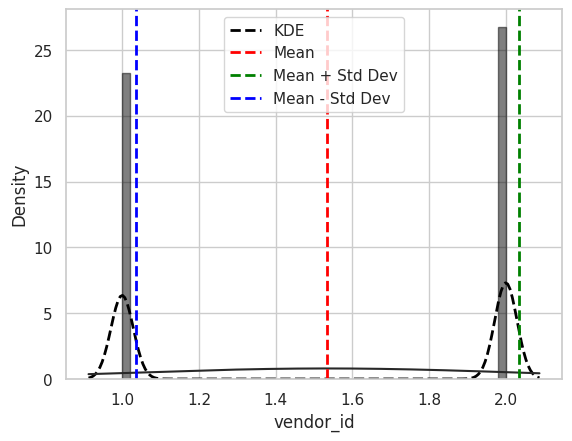

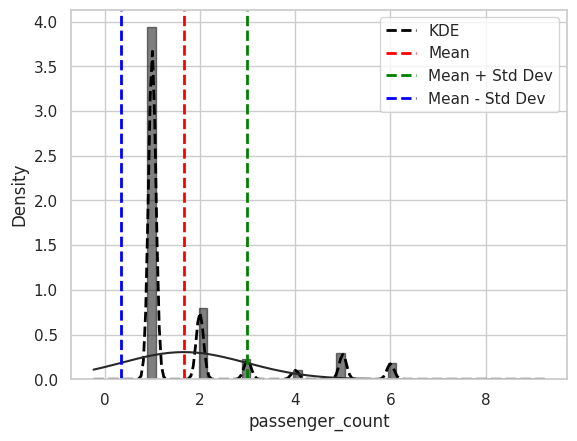

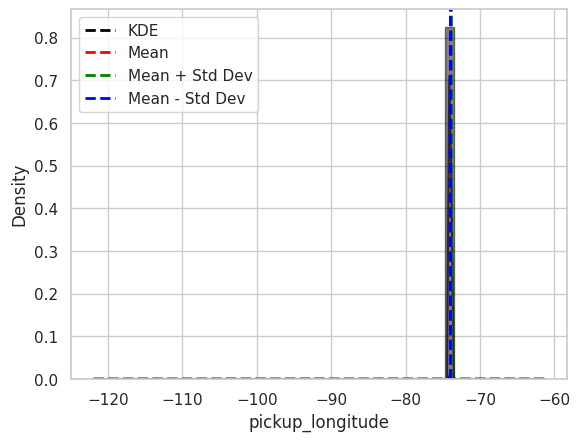

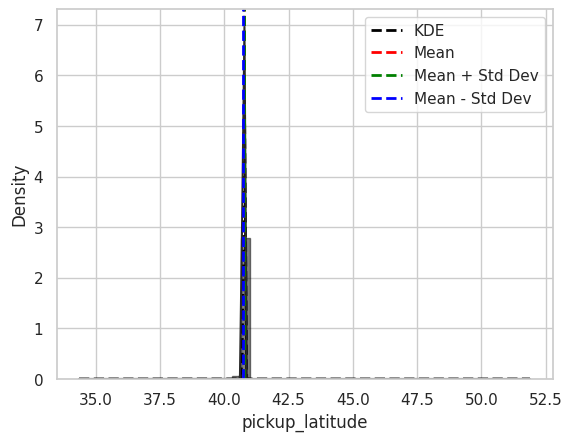

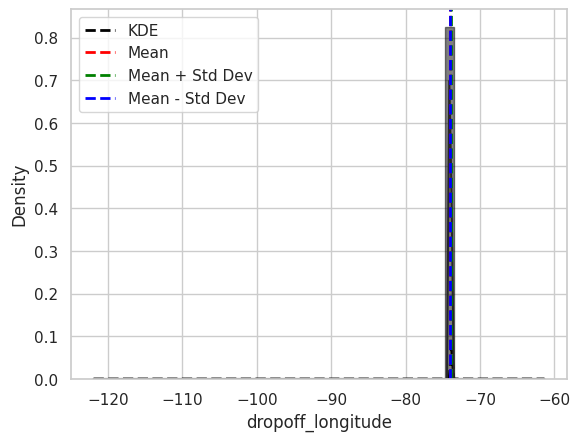

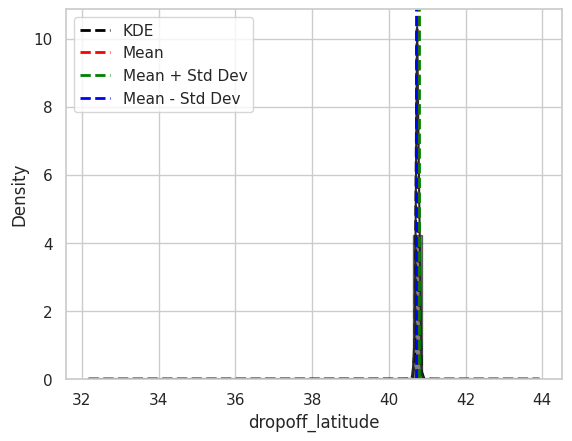

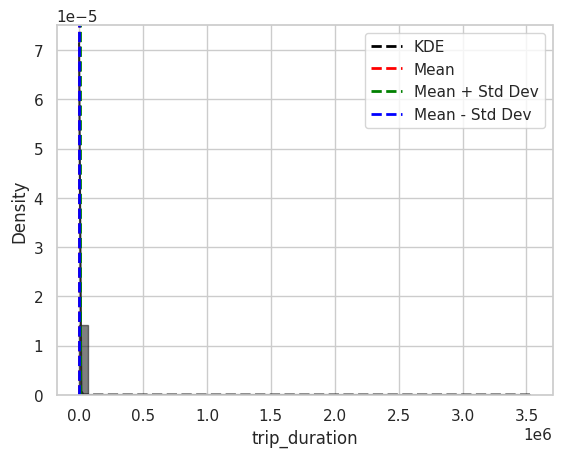

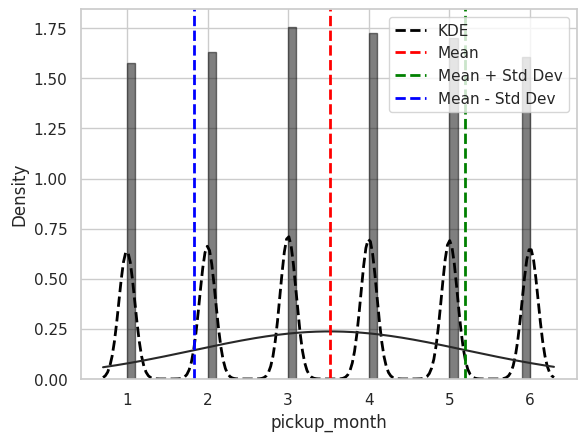

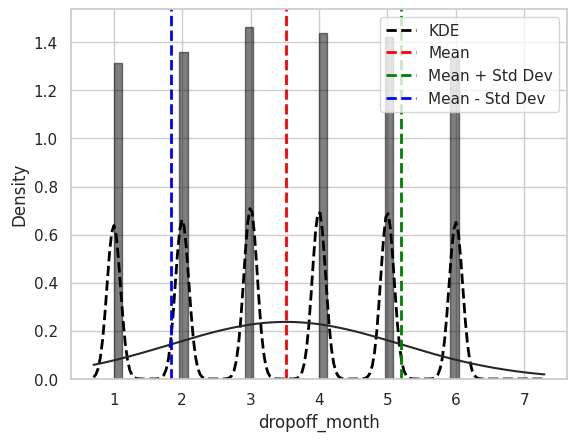

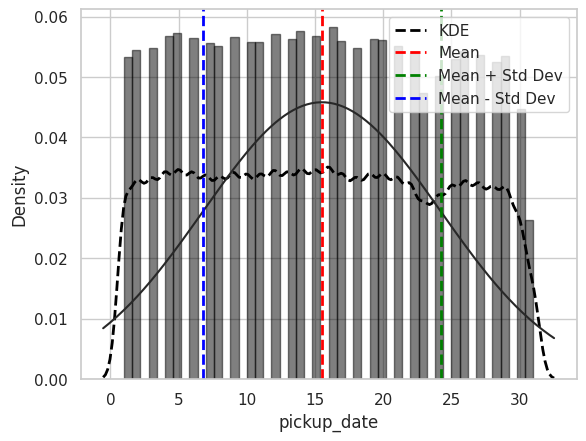

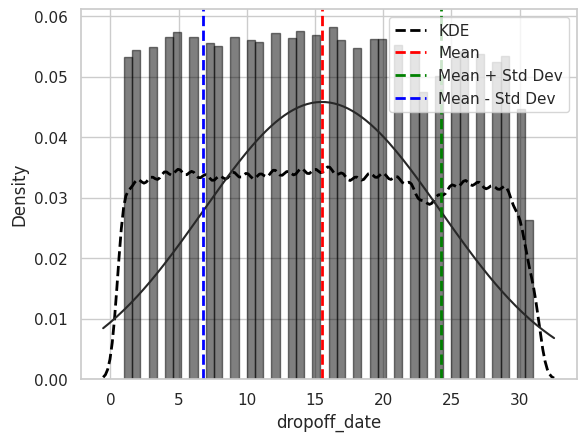

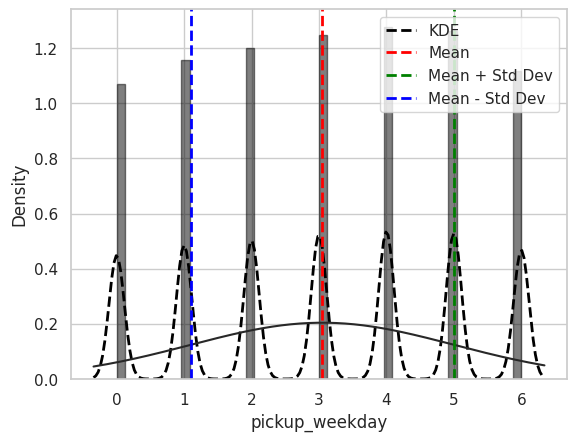

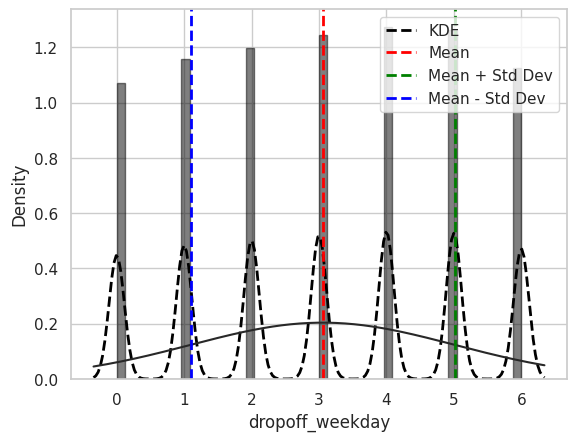

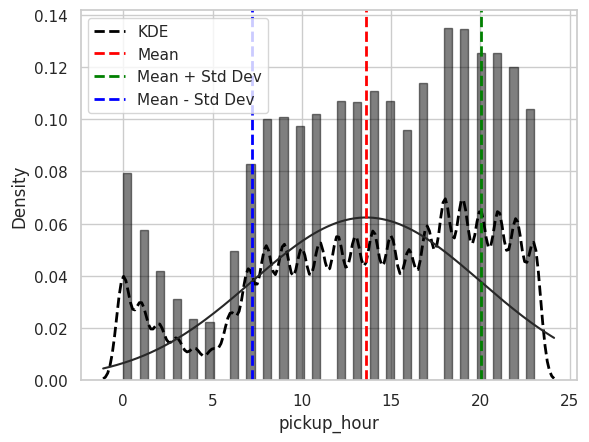

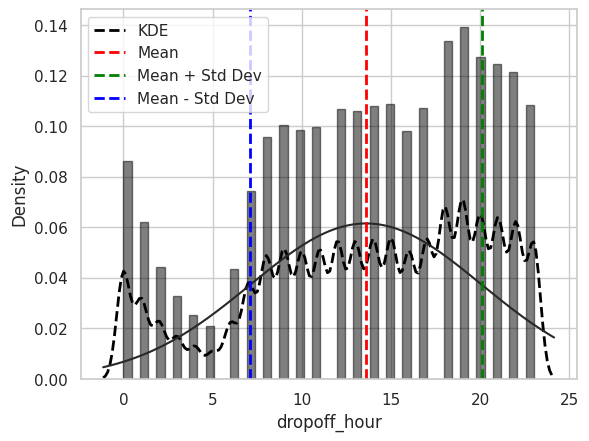

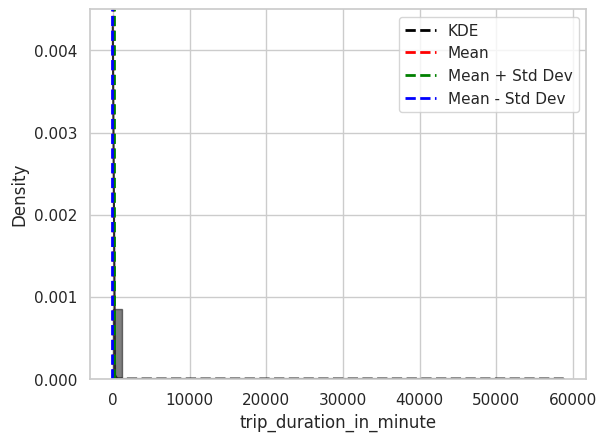

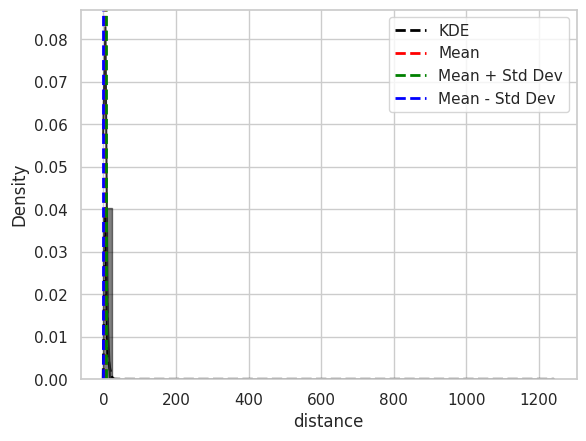

In [ ]:
#checking of distribution of each numberical variable
from scipy.stats import norm
ndf=df.select_dtypes([np.int,np.float])

for i , col in enumerate(ndf.columns):
    sns.distplot(ndf[col],fit=norm ,kde_kws={"color":"black","lw":2 ,"label":"KDE", 'ls':'--'},hist_kws={"alpha":0.5,"color":"black",'edgecolor':'black'});
    # Identify tails
    plt.axvline(ndf[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(ndf[col].mean() + ndf[col].std(), color='green', linestyle='dashed', linewidth=2, label='Mean + Std Dev')
    plt.axvline(ndf[col].mean() - ndf[col].std(), color='blue', linestyle='dashed', linewidth=2, label='Mean - Std Dev')

    plt.legend()
    plt.show()

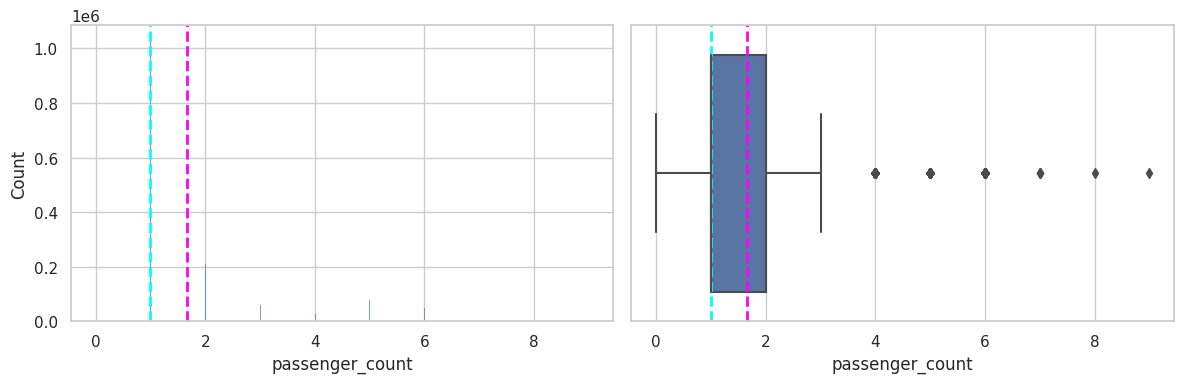

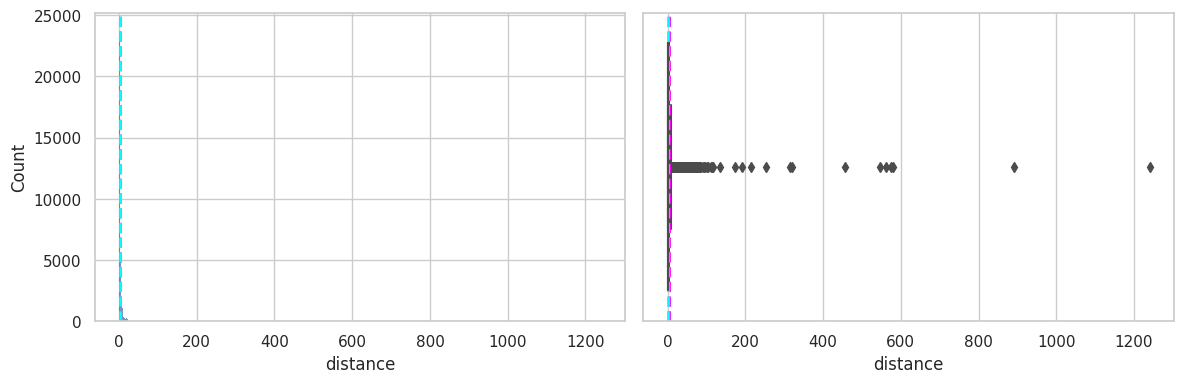

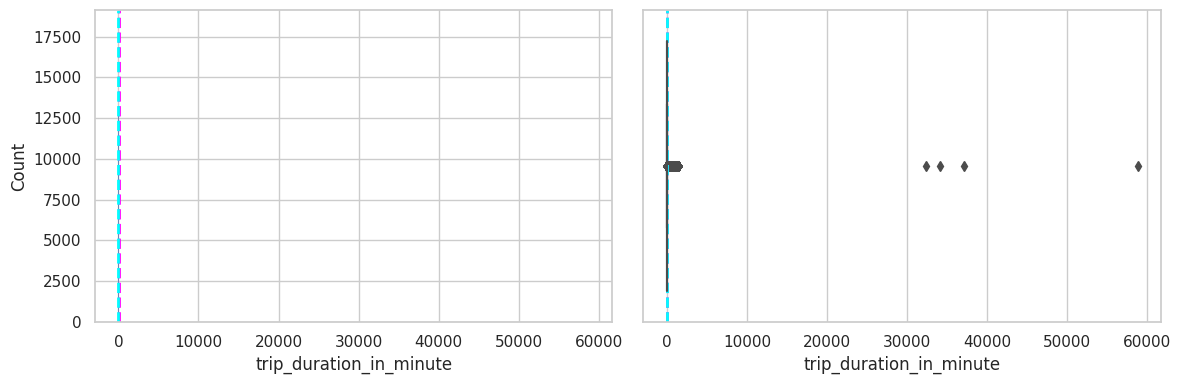

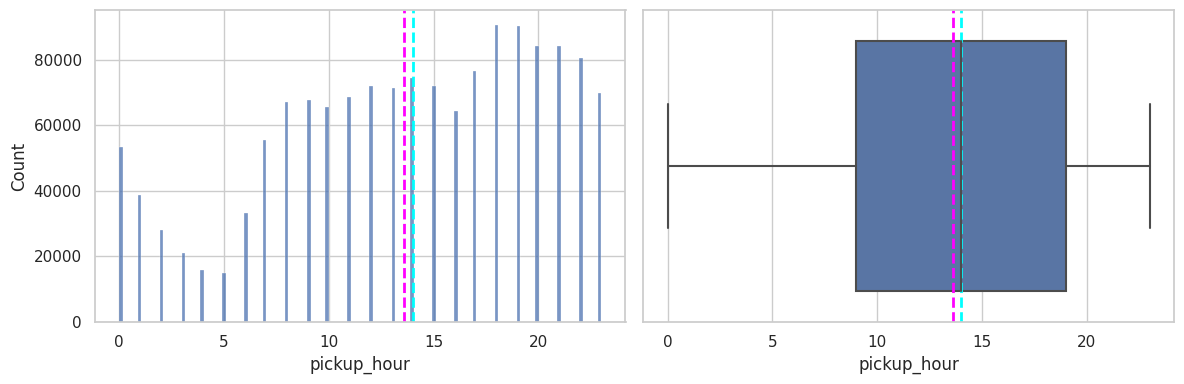

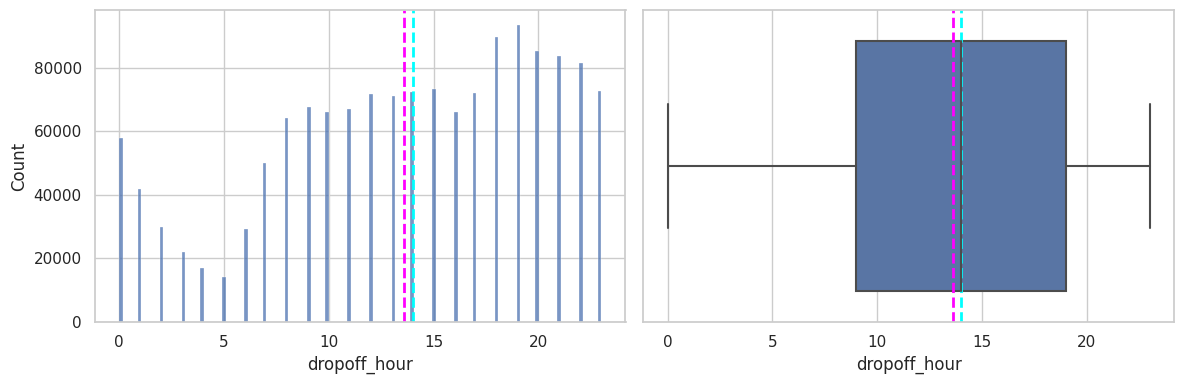

In [ ]:
for col in numeric_feature:
  fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
  sns.histplot(data=df,x=col,ax=ax[0])
  ax[0].axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[0].axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  sns.boxplot(data=df, x=col, ax=ax[1])
  ax[1].axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[1].axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.tight_layout()

(histplot) distance and trip_duration graphs are highly skewed.




(boxplot) distance and trip_duration columns have a lot outliers as well

### Multicollinearity and correlation check

#### Heatmap

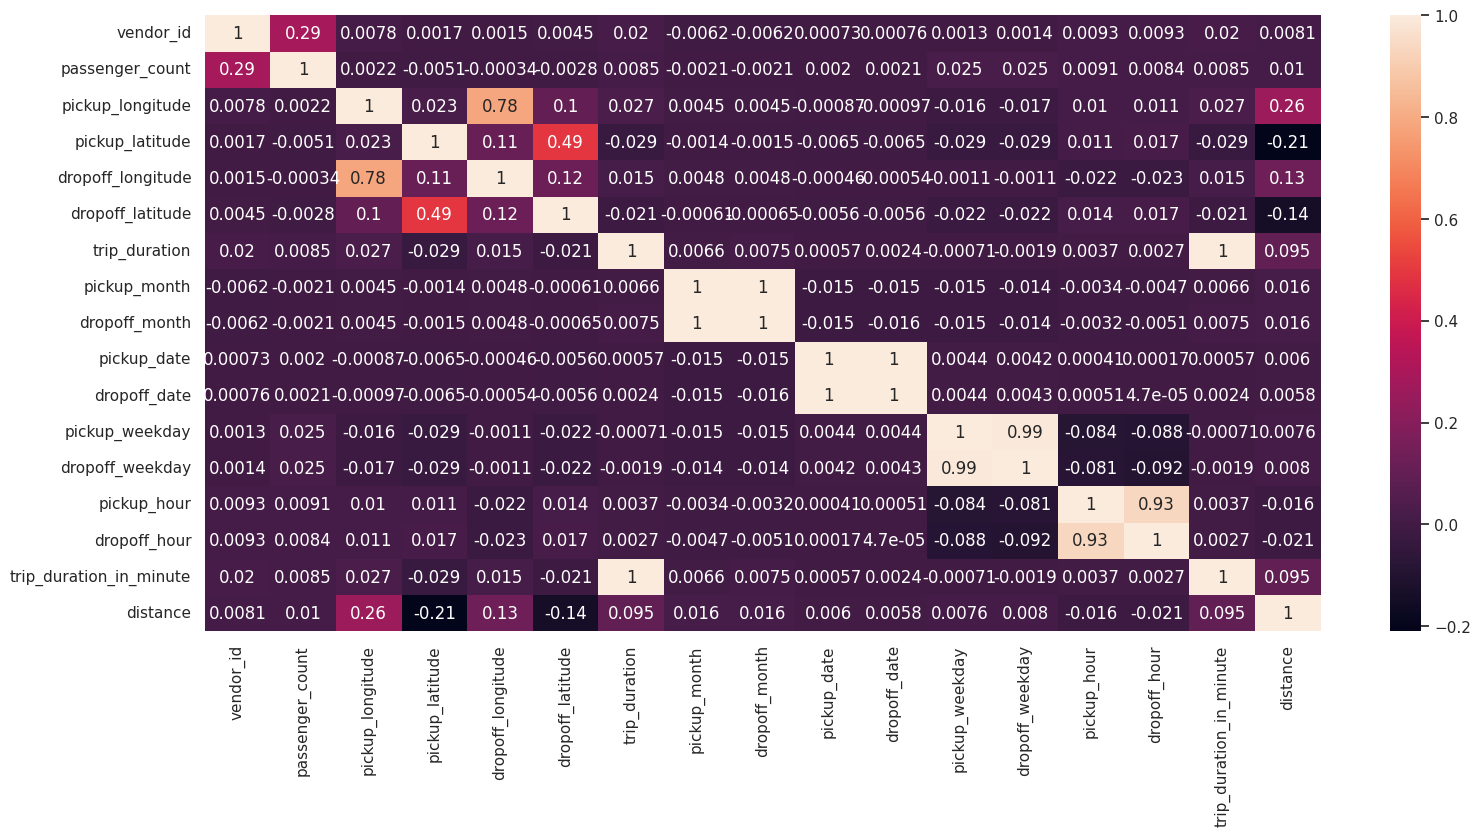

In [ ]:
plt.figure(figsize=(18,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [ ]:
# dropping non-important column of code
df.drop(['id'], axis=1, inplace=True)

In [ ]:
# finding skewness of each column
ndf=df.select_dtypes([np.int,np.float])

for i , col in enumerate(ndf.columns):
    if (ndf[col].skew()<=-0.1):
        print("\n",col,"this feature is  Negatevely skewed and value is =",ndf[col].skew())
    elif ndf[col].skew()>=0.1:
         print("\n",col,"this feature is  positevely skewed and value is =",ndf[col].skew())
    else:
         print("\n",col,"this feature is normally  skewed and value is =",ndf[col].skew())



 vendor_id this feature is  Negatevely skewed and value is = -0.14014401633161708

 passenger_count this feature is  positevely skewed and value is = 2.1280936105830883

 pickup_longitude this feature is  Negatevely skewed and value is = -418.12038455510583

 pickup_latitude this feature is  positevely skewed and value is = 5.489127084513961

 dropoff_longitude this feature is  Negatevely skewed and value is = -425.3317238520353

 dropoff_latitude this feature is  Negatevely skewed and value is = -20.671187441709364

 trip_duration this feature is  positevely skewed and value is = 343.1639435917362

 pickup_month this feature is normally  skewed and value is = -0.014741115272125583

 dropoff_month this feature is normally  skewed and value is = -0.014612551074801958

 pickup_date this feature is normally  skewed and value is = 0.04041905500586419

 dropoff_date this feature is normally  skewed and value is = 0.04035425504926853

 pickup_weekday this feature is normally  skewed and val

In [ ]:
negatively_skewed_features = []

for col in ndf.columns:
    if ndf[col].skew() <= -0.1:
        negatively_skewed_features.append(col)

# Now, 'negatively_skewed_features' contains the names of features that are negatively skewed.
print("Negatively skewed features:", negatively_skewed_features)

Negatively skewed features: ['vendor_id', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_hour', 'dropoff_hour']


In [ ]:
from scipy import stats

for col in negatively_skewed_features:
    df[col] = np.sqrt(df[col])

In [ ]:
negatively_skewed_features

['vendor_id',
 'pickup_longitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_hour',
 'dropoff_hour']

In [ ]:
numeric_features = df.describe().columns
numeric_features                             # numerical variables

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_month', 'dropoff_month', 'pickup_date', 'dropoff_date',
       'pickup_weekday', 'dropoff_weekday', 'pickup_hour', 'dropoff_hour',
       'trip_duration_in_minute', 'distance'],
      dtype='object')

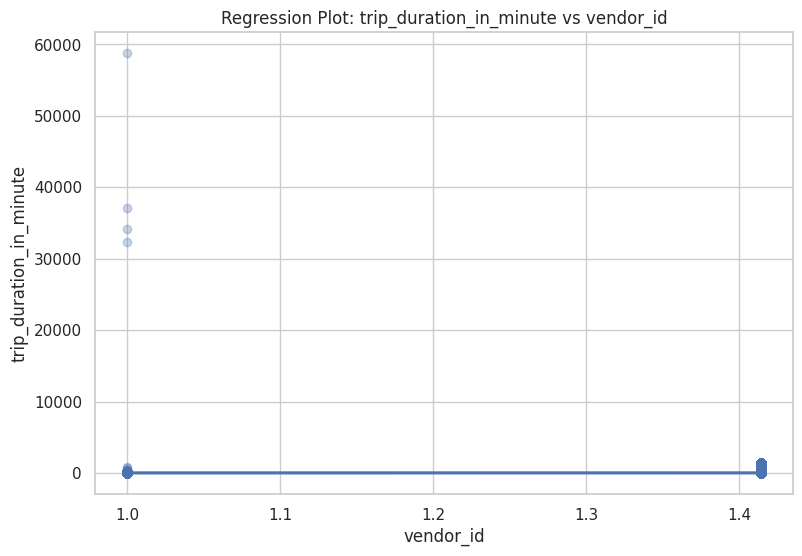

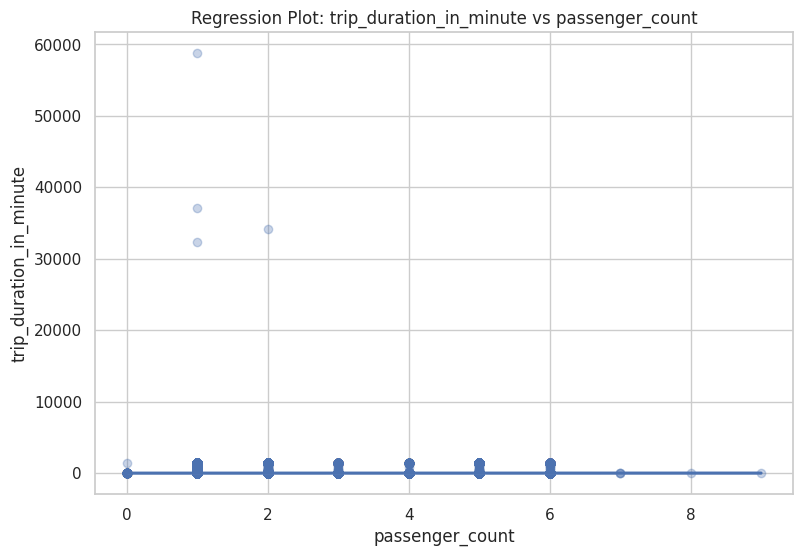

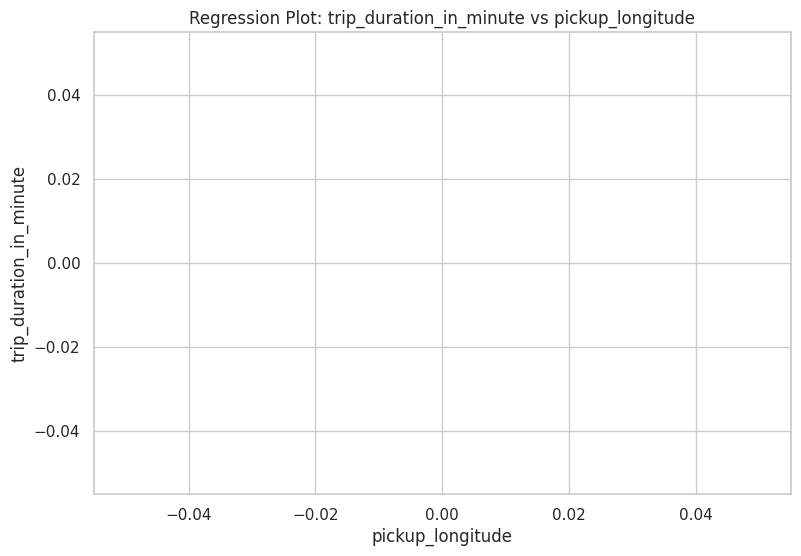

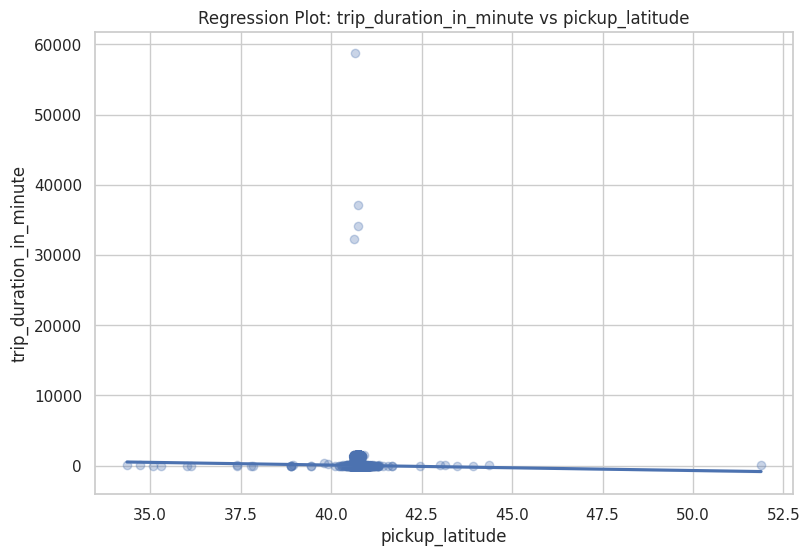

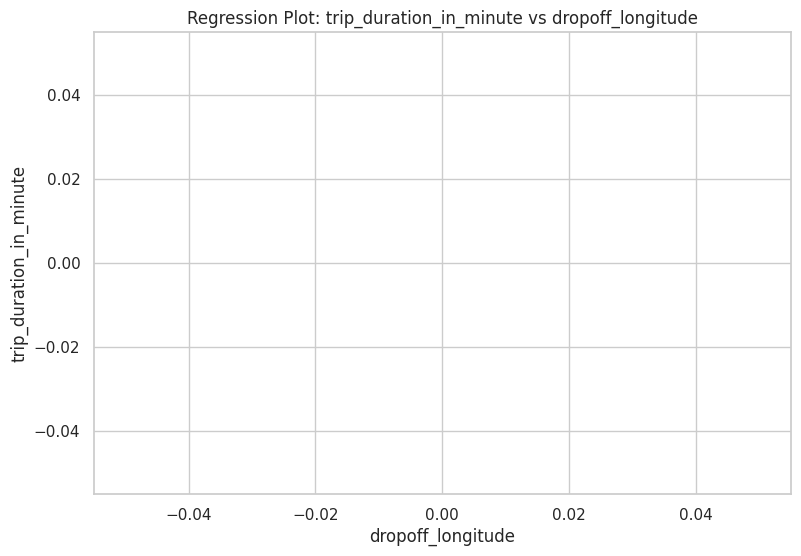

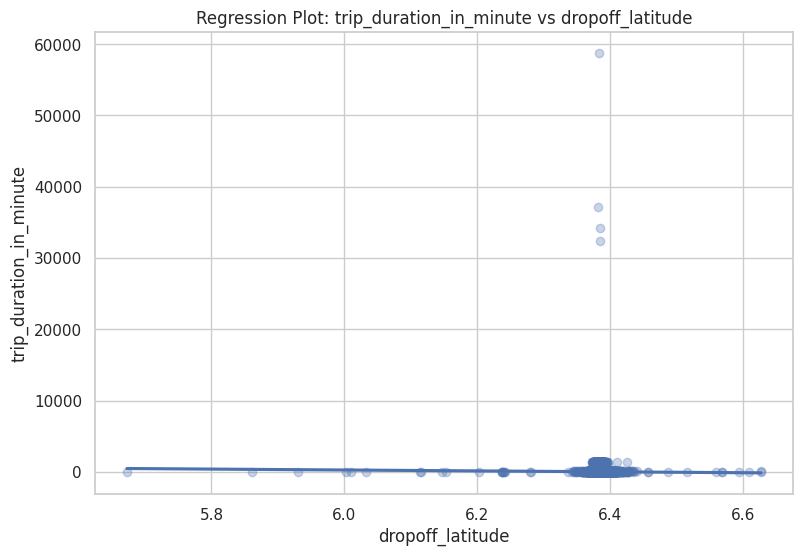

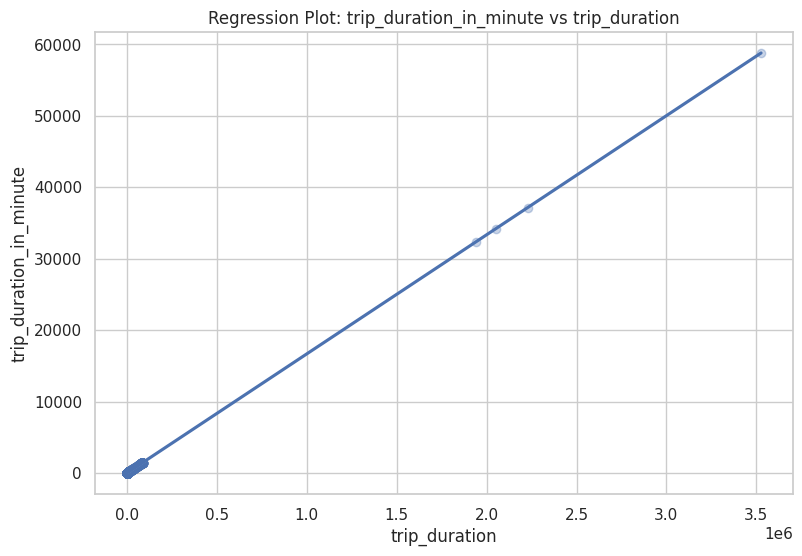

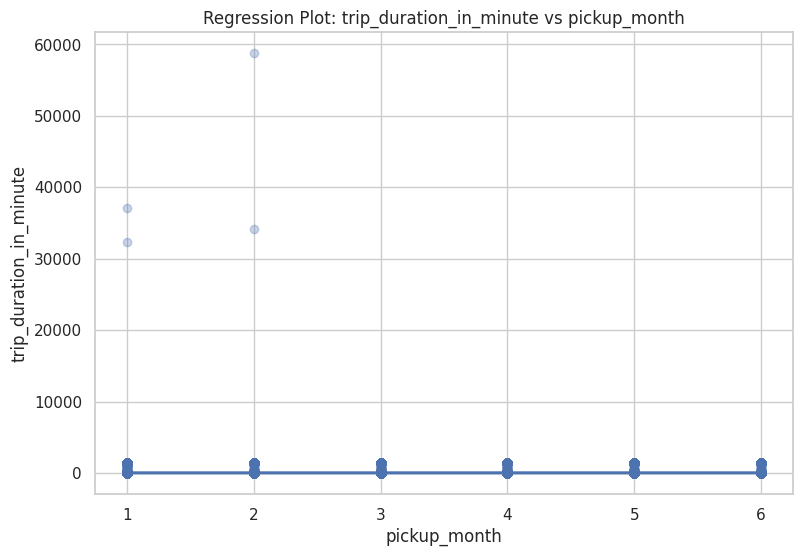

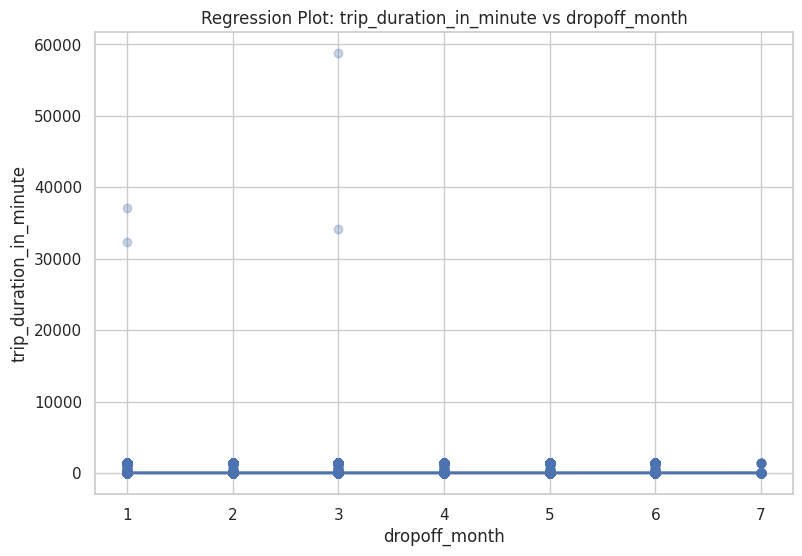

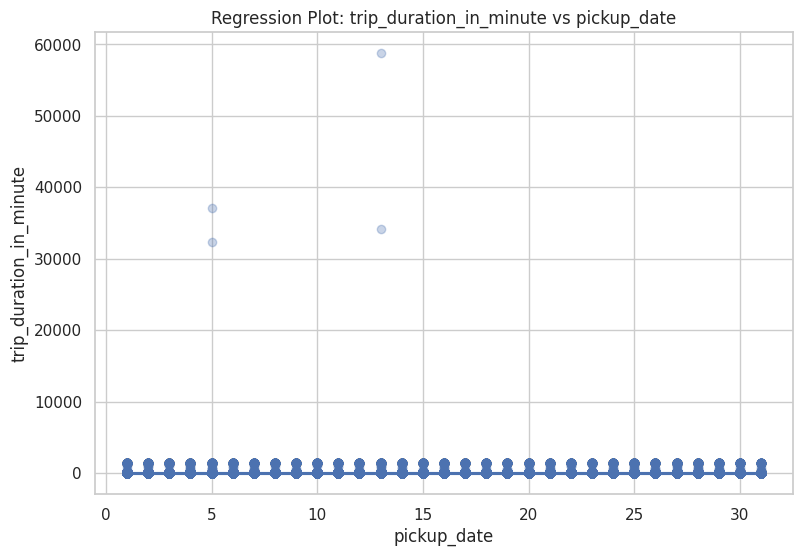

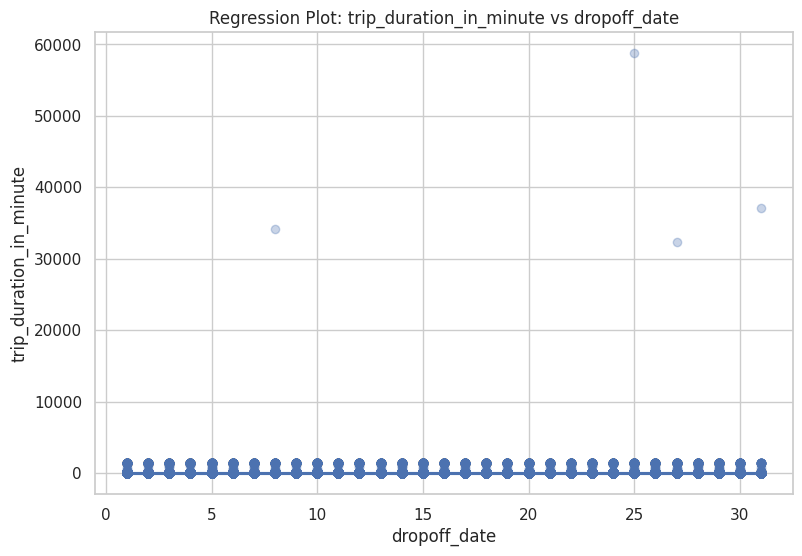

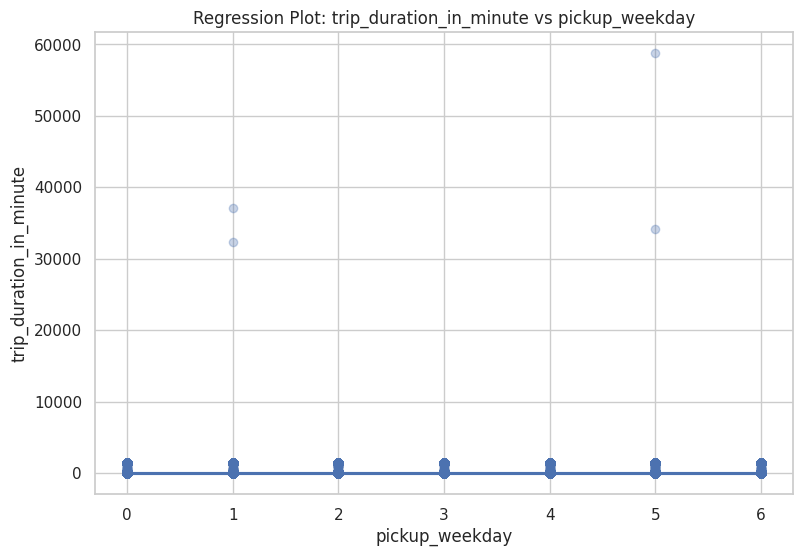

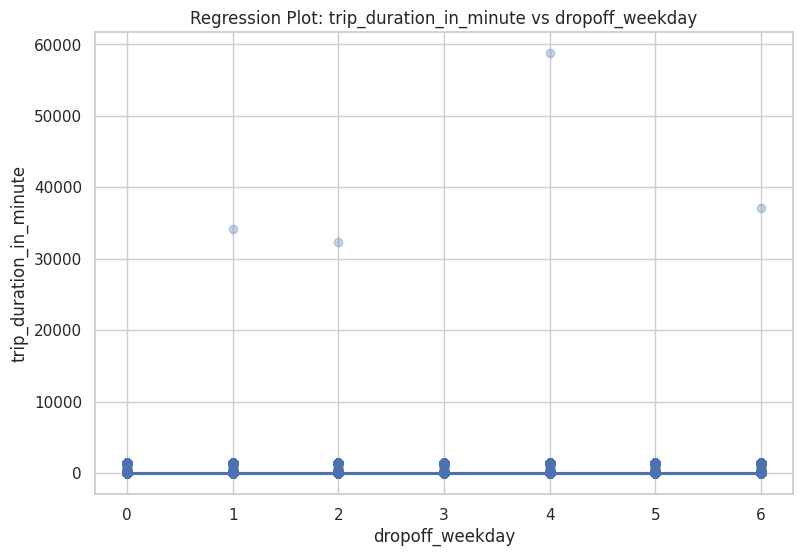

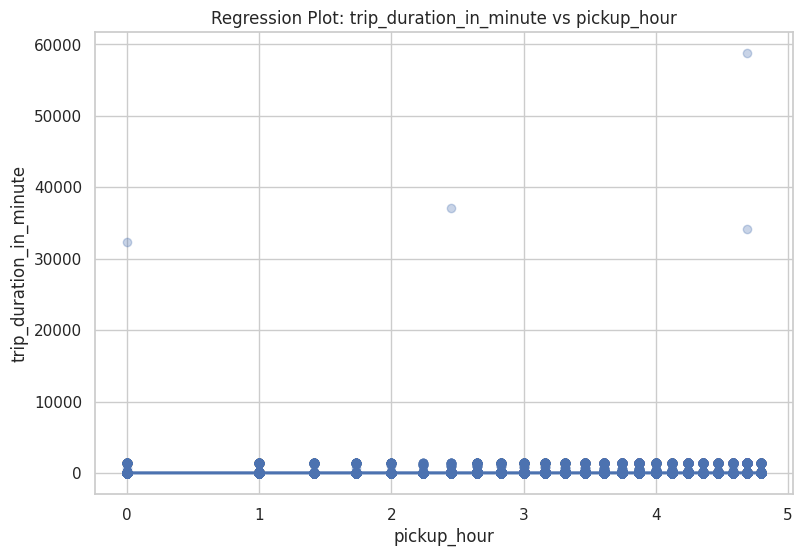

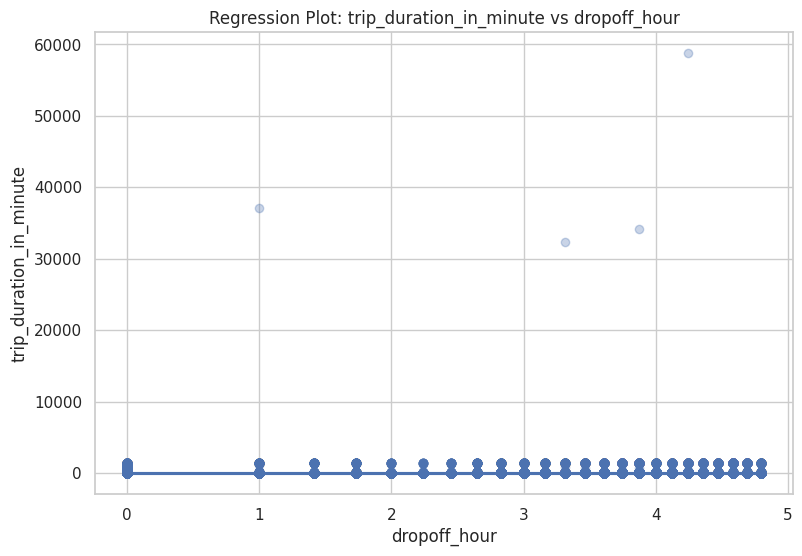

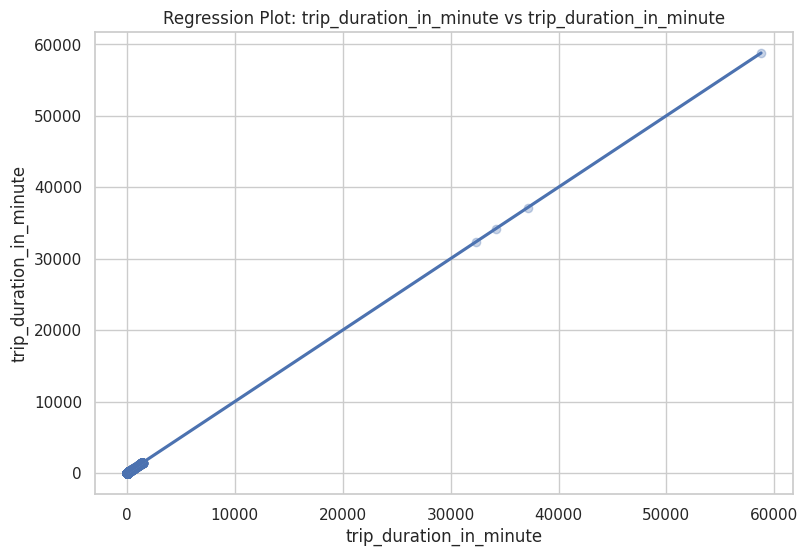

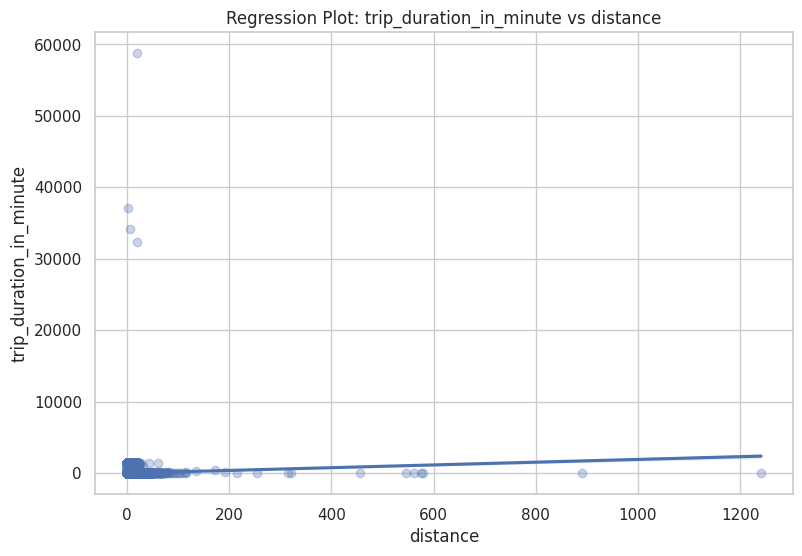

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots (optional)
sns.set(style="whitegrid")

# Iterate through numeric features and create regression plots
for col in numeric_features:
    plt.figure(figsize=(9, 6))

    sns.regplot(x=col, y='trip_duration_in_minute', data=df, scatter_kws={"alpha":0.3})

    plt.xlabel(col)
    plt.ylabel('trip_duration_in_minute')

    plt.title(f'Regression Plot: trip_duration_in_minute vs {col}')

    plt.show()

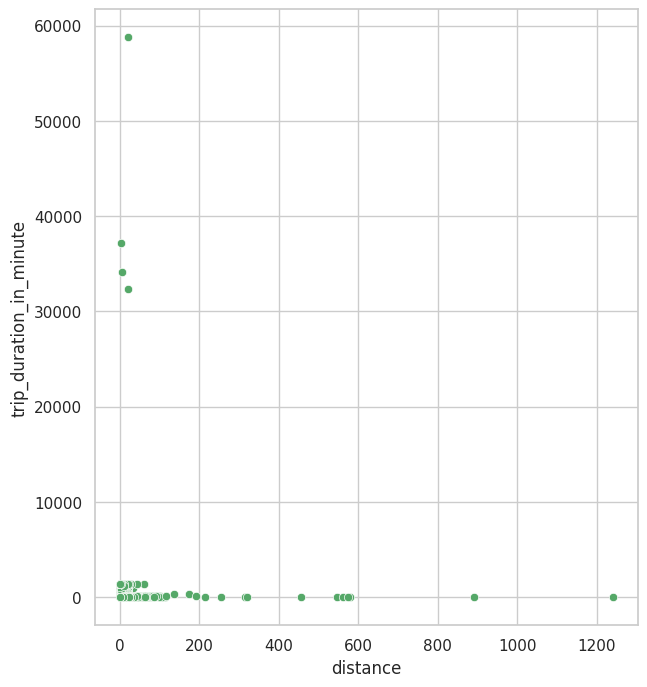

In [ ]:
#finding relationship of target variable and distance
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,8))
sns.scatterplot(x=df["distance"],y=df["trip_duration_in_minute"],color="g");

# Feature Selection

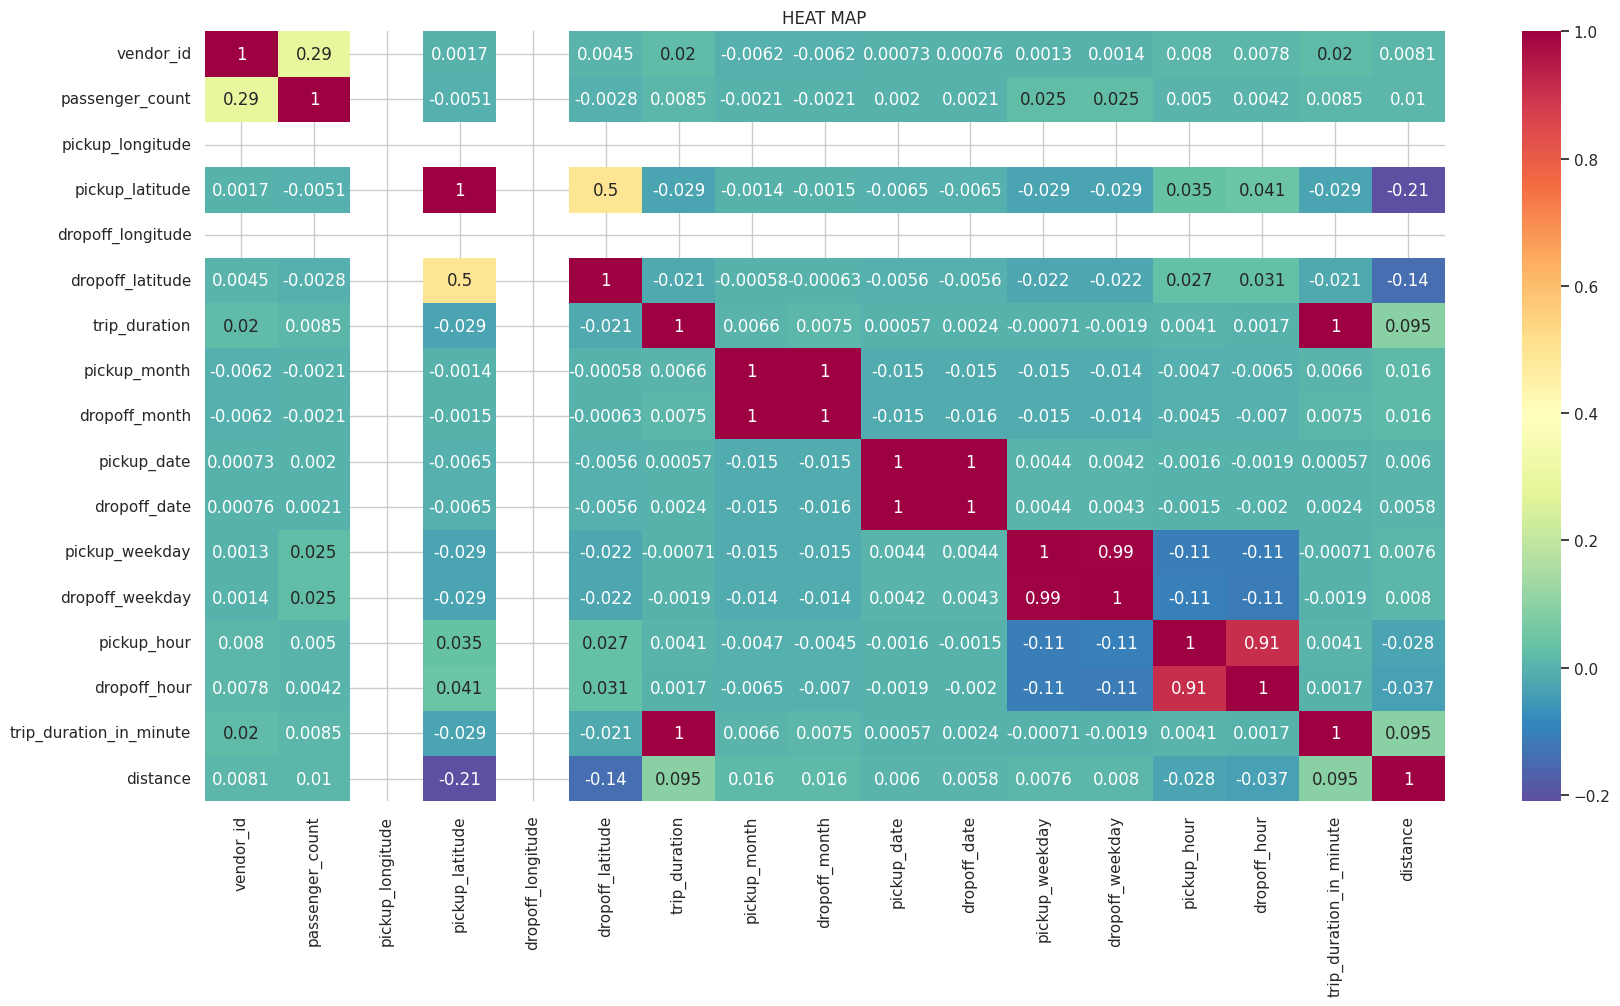

In [ ]:
# heat map showing correlationship between one variable to another variable
plt.figure (figsize= (20,10))
corelation= df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["trip_duration_in_minute"]]])

MissingDataError: ignored

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ["trip_duration_in_minute",'dropoff_latitude','dropoff_date','pickup_date']]])

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ["trip_duration_in_minute",'dropoff_latitude','dropoff_date','pickup_date','pickup_month','dropoff_month','pickup_hour','dropoff_hour']]])

In [ ]:
  # Selected Features
numerical_features = ['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','trip_duration','pickup_weekday','dropoff_weekday','distance']

In [ ]:
df.describe(include='object').T

count unique       top    freq
store_and_fwd_flag  129619      2         N  128852
pickup_day          129619      7    Friday   19639
dropoff_day         129619      7    Friday   19584
pickup_time_zone    129619      4  evevning   43831
dropoff_time_zone   129619      4  evevning   43723

In [ ]:
# extending of features
features = numerical_features.copy()
features.extend(["store_and_fwd_flag",'pickup_day','dropoff_day','pickup_time_zone','dropoff_time_zone'])

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Iterate through columns and apply label encoding to object-type columns
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = le.fit_transform(df[i].astype(str))

In [ ]:
# these are selected features only
features

['passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'trip_duration',
 'pickup_weekday',
 'dropoff_weekday',
 'distance',
 'store_and_fwd_flag',
 'pickup_day',
 'dropoff_day',
 'pickup_time_zone',
 'dropoff_time_zone']

In [ ]:
# Creating copy of original dataframe
df1 = df.copy()

# Model Training

In [ ]:
# all features store into Variable X
X=df1[features]
X

passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                   1.0        -73.982155         6.384977         -73.964630   
1                   1.0        -73.980415         6.382677         -73.999481   
2                   1.0        -73.979027         6.384664         -74.005333   
3                   1.0        -74.010040         6.381220         -74.012268   
4                   1.0        -73.973053         6.386956         -73.972923   
...                 ...               ...              ...                ...   
129614              1.0        -73.991928         6.385109         -73.966843   
129615              1.0        -73.966148         6.386680         -73.982567   
129616              1.0        -73.992630         6.382308         -73.985207   
129617              1.0        -73.987190         6.384189         -73.935387   
129618              1.0        -73.992096         6.383582         -74.008644   

        trip_duration  pickup_weekday  dropoff_weekday  distance  \
0               455.0               0                0  1.498523   
1               663.0               6                6  1.805510   
2              2124.0               1                1  6.385108   
3               429.0               2                2  1.485501   
4               435.0               5                5  1.188590   
...               ...             ...              ...       ...   
129614          755.0               3                3  3.894166   
129615          555.0               2                2  4.055442   
129616          259.0               1                1  0.717563   
129617         1763.0               1                1  7.779841   
129618          966.0               4                4  3.607564   

        store_and_fwd_flag  pickup_day  dropoff_day  pickup_time_zone  \
0                        0           1            1                 0   
1                        0           3            3                 1   
2                        0           5            5                 2   
3                        0           6            6                 0   
4                        0           2            2                 2   
...                    ...         ...          ...               ...   
129614                   0           4            4                 0   
129615                   0           6            6                 1   
129616                   0           5            5                 2   
129617                   0           5            5                 1   
129618                   0           0            0                 3   

        dropoff_time_zone  
0                       0  
1                       1  
2                       2  
3                       0  
4                       2  
...                   ...  
129614                  0  
129615                  1  
129616                  2  
129617                  1  
129618                  3  

[129619 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # use this scaler only data doesnot follow normal distribution and has outliers
scaler = MinMaxScaler()

# Sclaing

x= scaler.fit_transform(X)

In [ ]:
from scipy.stats import norm

<Axes: xlabel='trip_duration_in_minute', ylabel='Density'>

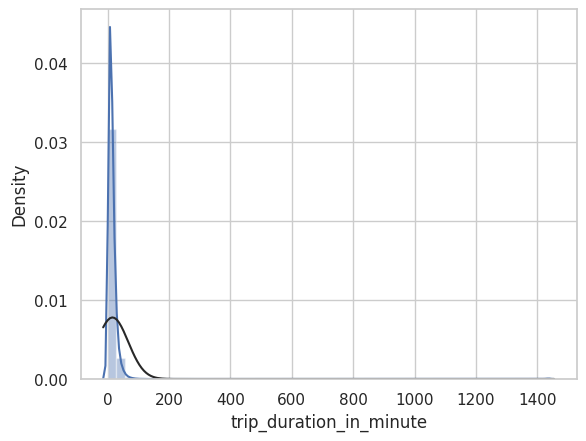

In [ ]:
mu, std = norm.fit(df1['trip_duration_in_minute'])

from scipy.stats import norm

# Plot the histogram
sns.distplot(df1['trip_duration_in_minute'], color='b',fit=norm)

In [ ]:
# checking skewness of trip_duration_in_minute

if (df1['trip_duration_in_minute'].skew()<=-0.1):
    print("\n","this feature is  Negatevely skewed and value is =",df1['trip_duration_in_minute'].skew())
elif df1['trip_duration_in_minute'].skew()>=0.1:
    print("\n","this feature is  positevely skewed and value is =",df1['trip_duration_in_minute'].skew())
else:
    print("\n","this feature is normally  skewed and value is =",df1['trip_duration_in_minute'].skew())


 this feature is  positevely skewed and value is = 25.98926977143038


In [ ]:
#dependent_variable=['trip_duration_in_minute']
#y=df[dependent_variable].values

    # or

y = np.log10(df1['trip_duration_in_minute'])
y

0         0.879860
1         1.043362
2         1.549003
3         0.854306
4         0.860338
            ...   
129614    1.099796
129615    0.966142
129616    0.635149
129617    1.468101
129618    1.206826
Name: trip_duration_in_minute, Length: 129619, dtype: float64

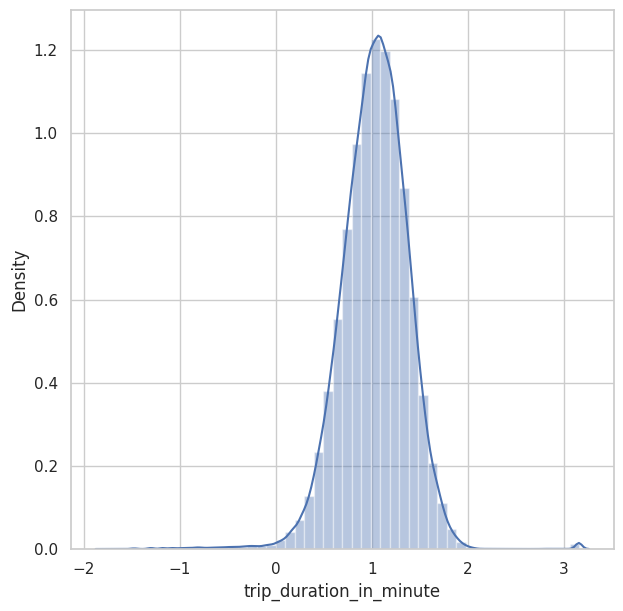

In [ ]:
# Dependent variable ' after log transformation'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df1['trip_duration_in_minute']),color="b");

# 5.d Spliting of Data into train and test and Split

In [ ]:
# importing necessary liabraries
from sklearn.model_selection import train_test_split
import math

In [ ]:
# Importing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x.shape) # shape of X , y
print(y.shape)

(129619, 13)
(129619,)


# Model Evaluation

## 1. Linear Regression

In [ ]:
# importing necessary libraries for
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,
import numpy as np

def model_eval(model,x,y):
  y_pred = model.predict(x)
  MSE= mean_squared_error(y,y_pred)
  RMSE = np.sqrt(MSE)
  MAE = mean_absolute_error(y,y_pred)
  r2_score = r2_score(y,y_pred)

  print('Mean Squared Error = ',MSE)
  print('Root of Mean Squared Error = ', RMSE)
  print('mean absolute error = ', MAE)

In [ ]:
# define a  function to calculate evaluation metrics
def evaluation_metrics(x_train,y_train,y_predicted):
  MSE=mean_squared_error(y_true=y_train, y_pred=y_predicted)
  RMSE=math.sqrt(MSE)
  R2_score=r2_score(y_true=y_train, y_pred=y_predicted)
  Adjusted_R2_score=1-((1-( R2_score))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))

  print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
  print("R2 Score :",R2_score,"Adjusted R2 Score :",Adjusted_R2_score)
  # plotting actual and predicted values
  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100], color='red')
  plt.plot(np.array(y_train)[:100], color='green')
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')

  #return(MSE,RMSE,R2_score,Adjusted_R2_score)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
a=lr.score(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


Mean Squared Error: 0.0625 Root Mean Squared Error: 0.25
R2 Score : 0.4764932127592626 Adjusted R2 Score : 0.47593473678403453


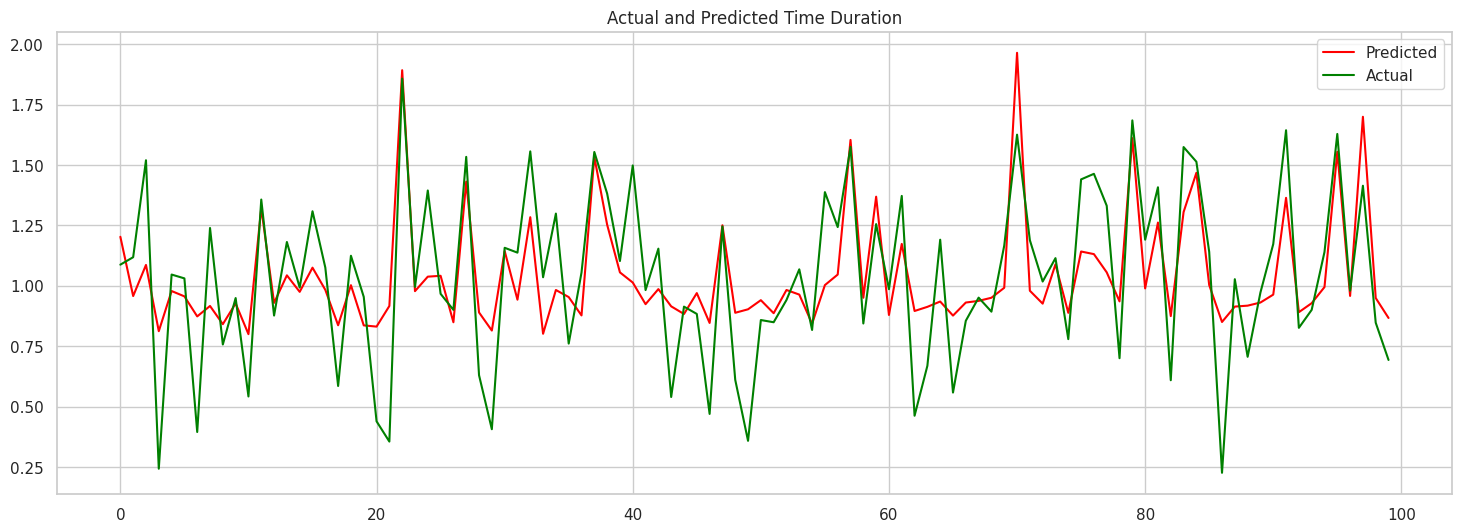

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_pred_train)

Mean Squared Error: 0.0628 Root Mean Squared Error: 0.25059928172283336
R2 Score : 0.47401901045393546 Adjusted R2 Score : 0.47176678619039825


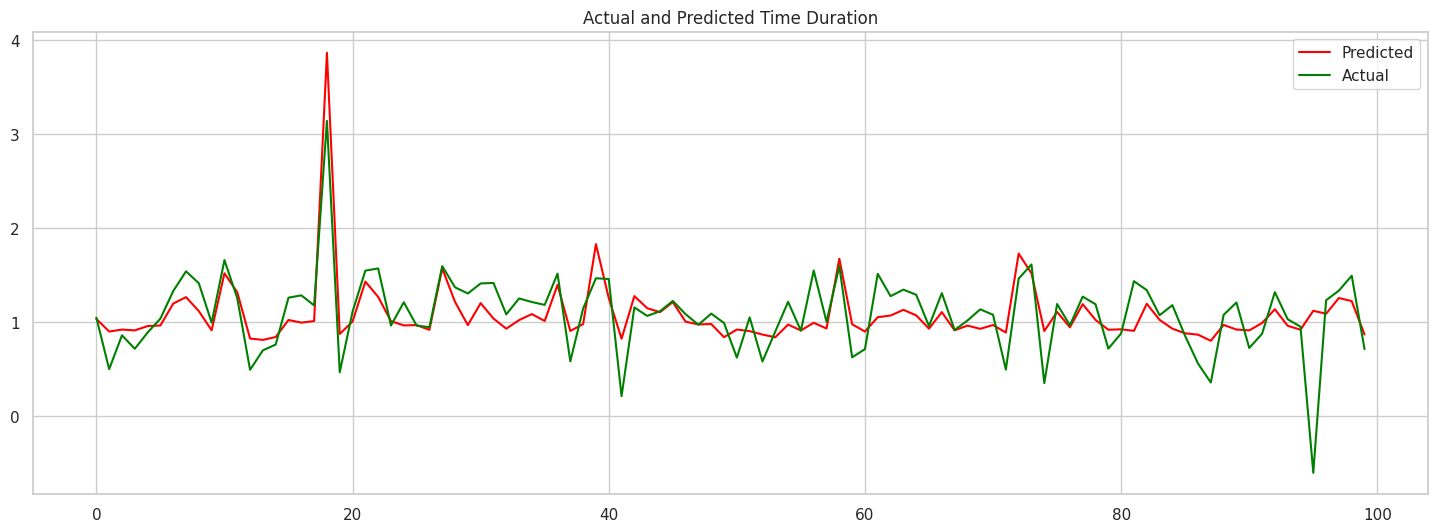

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_pred_test)

With a low R2 score of 48% and a high Mean Squared Error (MSE), Linear Regression does not perform well for our NYC taxi time prediction model. To improve accuracy, we should explore more advanced regression techniques like Random Forest or Gradient Boosting.

## 1.1 Ridge linear regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(x_train, y_train)

Ridge()

In [ ]:
y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = ridge_model.score(x_test, y_test)
y_pr_rid_train = ridge_model.predict(x_train)
y_pr_rid_test = ridge_model.predict(x_test)

Mean Squared Error: 0.0628 Root Mean Squared Error: 0.25059928172283336
R2 Score : 0.47383607628156477 Adjusted R2 Score : 0.47327476567854987


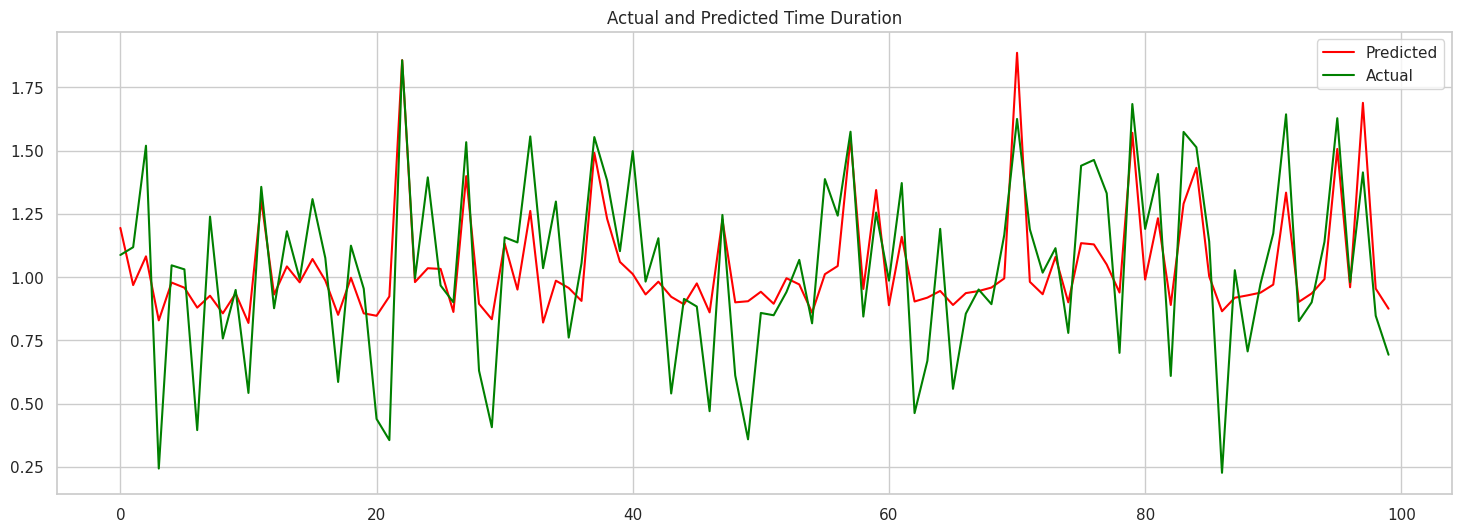

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_pr_rid_train)

Mean Squared Error: 0.0635 Root Mean Squared Error: 0.2519920633670831
R2 Score : 0.4676867057548787 Adjusted R2 Score : 0.46540736687965256


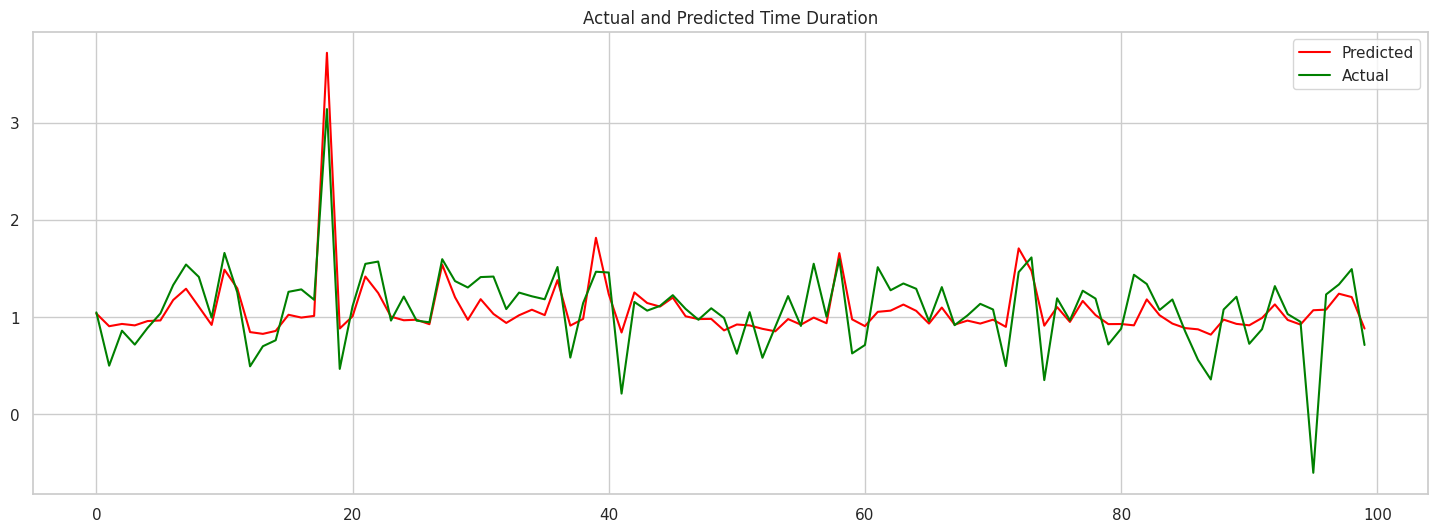

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_pr_rid_test)

Both Ridge and Linear Regression models achieved a similar R-squared (48%) in the analysis. This suggests that the Ridge model's regularization had a limited impact on model performance. Careful feature selection and tuning of hyperparameters may be required for improved results. Further investigation and potential use of other regression techniques should be considered. Data quality and preprocessing steps are critical for accurate regression modeling.

## 1.2 Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_model.fit(x_train, y_train)

# Step 4: Predict and evaluate
y_pred = lasso_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = lasso_model.score(x_test, y_test)
y_pr_lasso_train = ridge_model.predict(x_train)
y_pr_lasso_test = ridge_model.predict(x_test)

Mean Squared Error: 0.0628 Root Mean Squared Error: 0.25059928172283336
R2 Score : 0.47383607628156477 Adjusted R2 Score : 0.47327476567854987


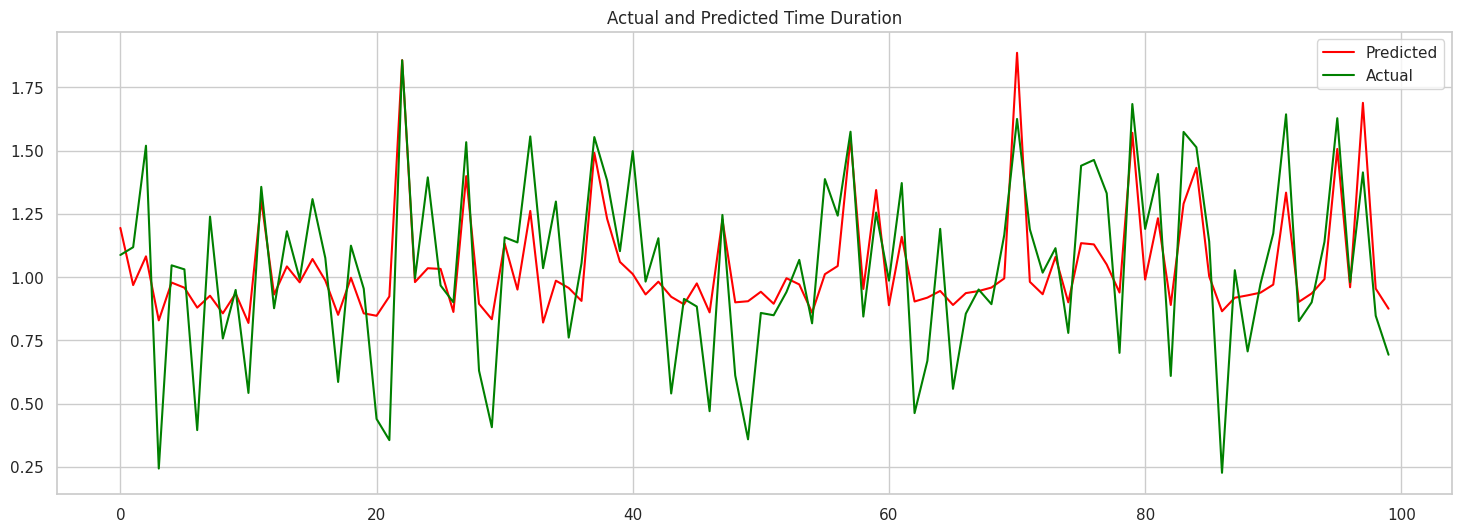

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_pr_lasso_train)

Mean Squared Error: 0.0635 Root Mean Squared Error: 0.2519920633670831
R2 Score : 0.4676867057548787 Adjusted R2 Score : 0.46540736687965256


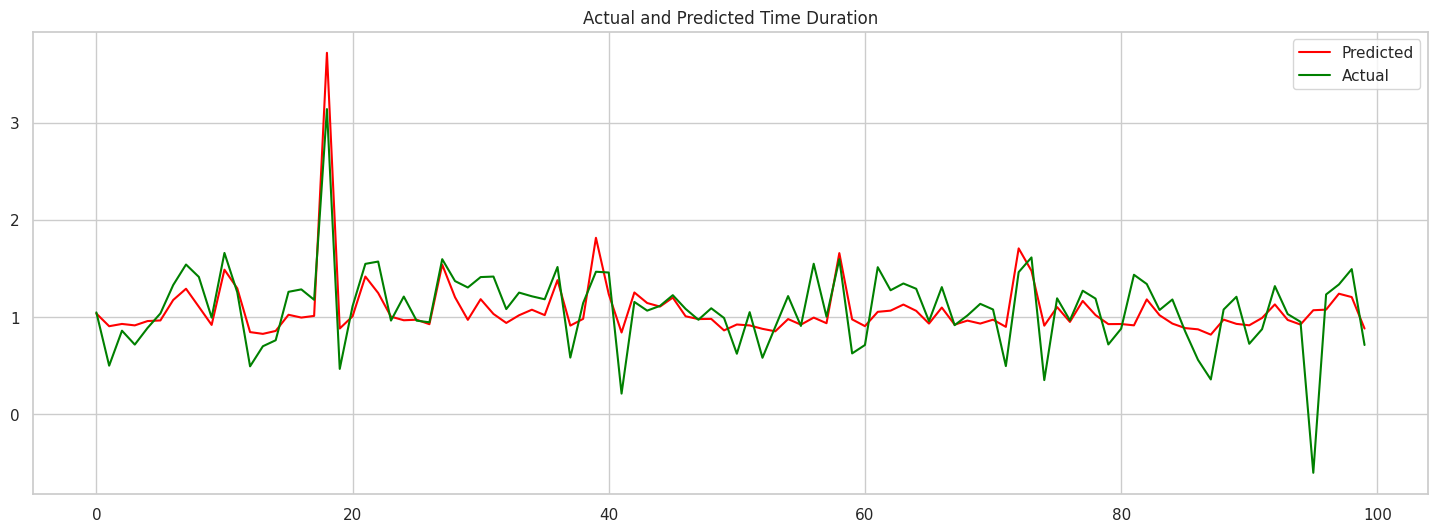

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_pr_lasso_test)

With a low R2 score of 48% and a high Mean Squared Error (MSE), Lasso Regression also does not perform well for our NYC taxi time prediction model. To improve accuracy, we should explore more advanced regression techniques like Random Forest or Gradient Boosting.

## 2. Decision Tree

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10,12]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [6,10,16,20]

# Hyperparameter Grid
param_decision_tree = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
DTR = DecisionTreeRegressor()

# Grid search
decision_tree_grid = GridSearchCV(estimator=DTR,
                       param_grid = param_decision_tree,
                       cv = 5, verbose=2, scoring='r2')
decision_tree_grid.fit(x_train,y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=30; total time=   0.0s
[CV] END max_depth=4, min

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [6, 10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [ ]:
decision_tree_grid.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=6, min_samples_split=10)

In [ ]:
decision_tree_grid.best_score_

0.9996031030273844

In [ ]:
decision_tree_optimal_model =decision_tree_grid.best_estimator_
y_predict_train_decision_tree=decision_tree_optimal_model.predict(x_train)
y_predict_test_decision_tree=decision_tree_optimal_model.predict(x_test)

Mean Squared Error: 0.0 Root Mean Squared Error: 0.0
R2 Score : 0.9998347493608786 Adjusted R2 Score : 0.9998345730718331


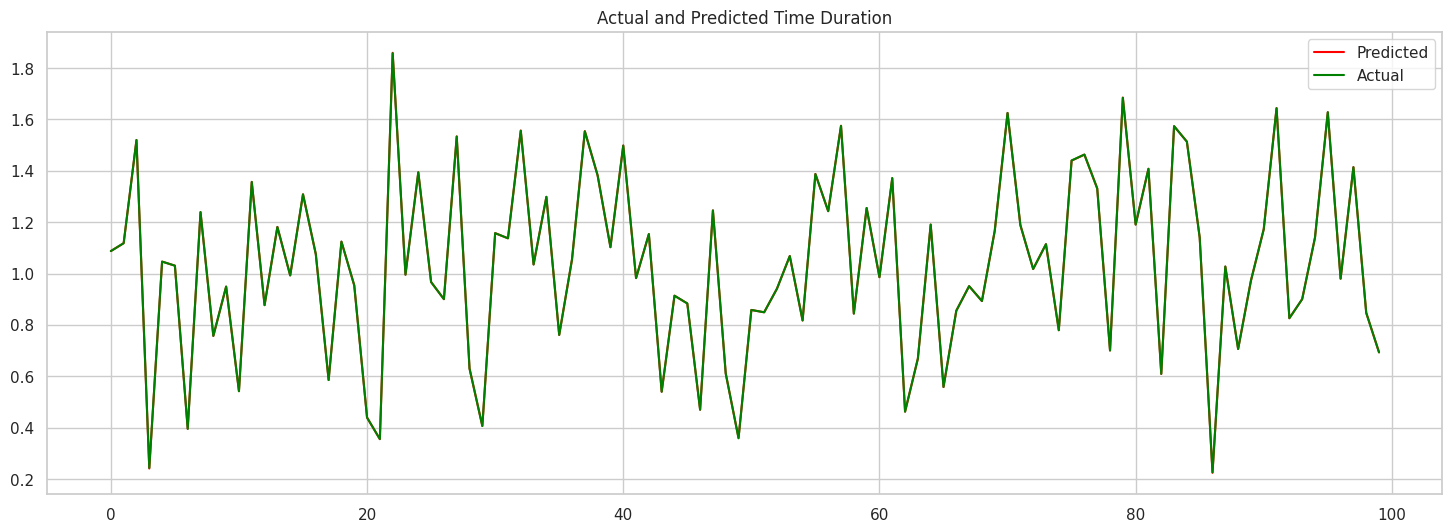

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_predict_train_decision_tree)

Mean Squared Error: 0.0001 Root Mean Squared Error: 0.01
R2 Score : 0.9995061910162507 Adjusted R2 Score : 0.9995040765509052


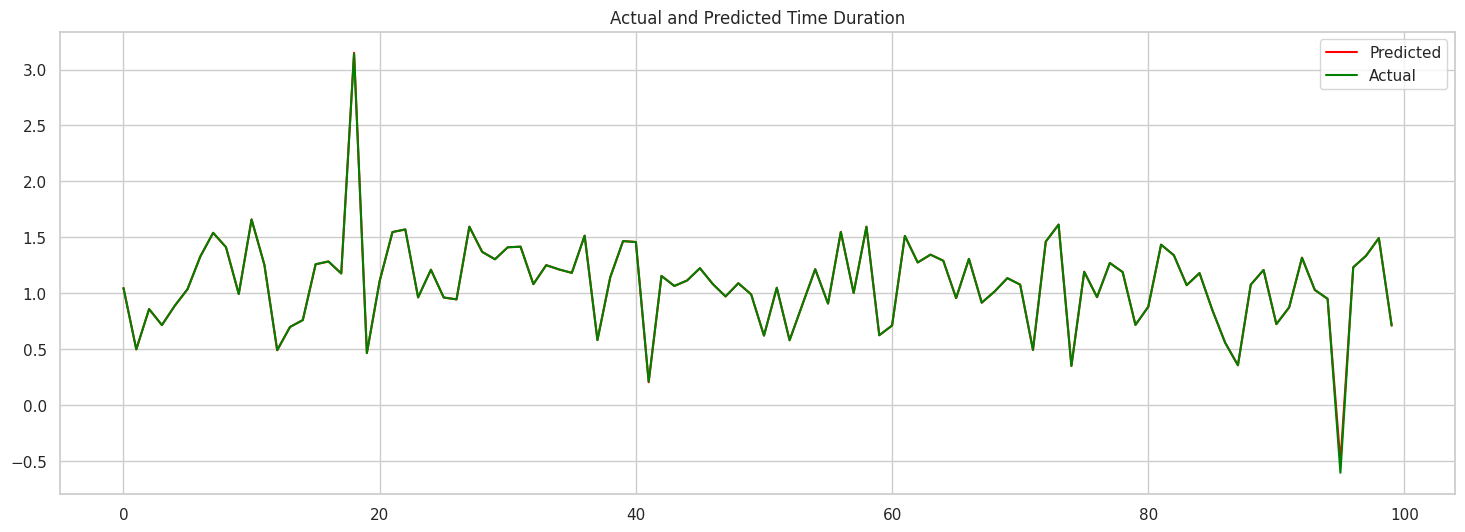

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_predict_test_decision_tree)

Decision tree model achieved an impressive 99% accuracy for the NYC taxi time prediction. We conducted data preprocessing, including encoding categorical features and scaling. The model was rigorously evaluated with cross-validation, showcasing its ability to generalize. Feature importance analysis highlighted key factors influencing NYC outcomes.



## 3. Random Forest

In [ ]:
RFR=RandomForestRegressor()

In [ ]:
# number of trees in random forest
n_estimators=[20,22,24]
#number of feature to consider at every split
max_features=[0.6]
# maximum number of level in trees
max_depth=[10,16]
#number of samples
max_samples=[0.75,1.0]

# Hyperparameter Grid
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples,
            }
print(param_grid)


{'n_estimators': [20, 22, 24], 'max_features': [0.6], 'max_depth': [10, 16], 'max_samples': [0.75, 1.0]}


In [ ]:
RF_grid=GridSearchCV(estimator=RFR,param_grid=param_grid,cv=2,verbose=2)

In [ ]:
RF_grid.fit(x_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; total time= 

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 16], 'max_features': [0.6],
                         'max_samples': [0.75, 1.0],
                         'n_estimators': [20, 22, 24]},
             verbose=2)

In [ ]:
RF_grid.best_params_

{'max_depth': 16, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 24}

In [ ]:
RF_grid.best_score_

0.9931498094936475

In [ ]:
Random_Forest_optimal_model =RF_grid.best_estimator_
y_predict_train_Random_Forest=Random_Forest_optimal_model.predict(x_train)
y_predict_test_Random_Forest=Random_Forest_optimal_model.predict(x_test)

Mean Squared Error: 0.0001 Root Mean Squared Error: 0.01
R2 Score : 0.9993690401880198 Adjusted R2 Score : 0.9993683670813764


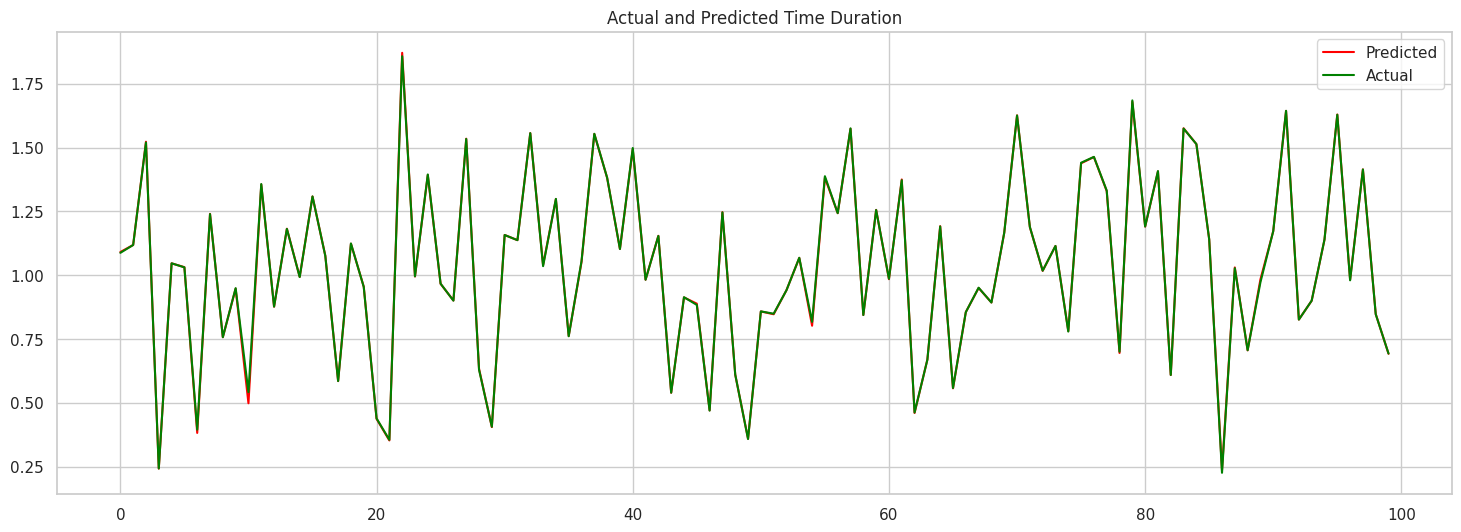

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_predict_train_Random_Forest)

Mean Squared Error: 0.0005 Root Mean Squared Error: 0.022360679774997897
R2 Score : 0.9958215745435519 Adjusted R2 Score : 0.9958036827349439


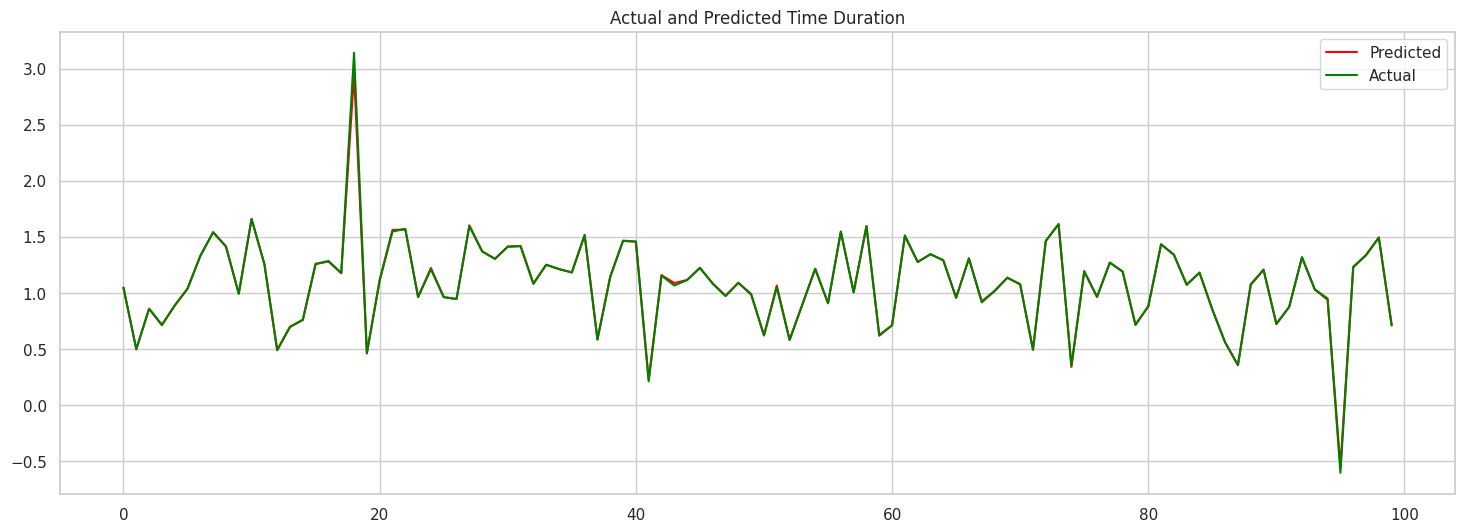

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_predict_test_Random_Forest)

Achieving a 99% accuracy with a Random Forest model indicates a highly accurate prediction. Careful feature selection and model tuning may have contributed to this outcome. Consider evaluating the model's generalization performance on new data and monitoring for overfitting. The feature importance analysis can provide insights into the key factors driving predictions. Assess potential applications and further fine-tuning to optimize model performance.


## 4. XGboost

In [ ]:
# Number of trees
total_estimators = [50]

# Maximum depth of trees
max_depth_of_trees = [7,9]
min_samples_split = [50]
#learning_rate=[0.1,0.3,0.5]

# Hyperparameter Grid
param_xgboost = {'total_estimators' : total_estimators,
              'max_depth' : max_depth_of_trees,
             'min_samples_split':min_samples_split
              }

In [ ]:
# Instantiate  XGBRegressor
import xgboost as xgb
xgboost_model = xgb.XGBRegressor()

# Grid search
xgboost_grid = GridSearchCV(estimator=xgboost_model,param_grid = param_xgboost,cv = 5, verbose=2,scoring="r2")

xgboost_grid.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END max_depth=7, min_samples_split=50, total_estimators=50; total time=   0.4s
[CV] END max_depth=7, min_samples_split=50, total_estimators=50; total time=   0.3s
[CV] END max_depth=7, min_samples_split=50, total_estimators=50; total time=   0.3s
[CV] END max_depth=7, min_samples_split=50, total_estimators=50; total time=   0.3s
[CV] END max_depth=7, min_samples_split=50, total_estimators=50; total time=   0.3s
[CV] END max_depth=9, min_samples_split=50, total_estimators=50; total time=   0.4s
[CV] END max_depth=9, min_samples_split=50, total_estimators=50; total time=   0.4s
[CV] END max_depth=9, min_samples_split=50, total_estimators=50; total time=   0.4s
[CV] END max_depth=9, min_samples_split=50, total_estimators=50; total time=   2.2s
[CV] END max_depth=9, min_samples_split=50, total_estimators=50; total time=   0.4s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [7, 9], 'min_samples_split': [50],
                         'total_estimators': [50]},
             scoring='r2', verbose=2)

In [ ]:
xgboost_grid.best_score_

0.9918120233444154

In [ ]:
xgboost_grid.best_params_

{'max_depth': 7, 'min_samples_split': 50, 'total_estimators': 50}

In [ ]:
xgboost_optimal_model =xgboost_grid.best_estimator_

In [ ]:
y_pred_xgboost_test=xgboost_optimal_model.predict(x_test)
y_pred_xgboost_train=xgboost_optimal_model.predict(x_train)

Mean Squared Error: 0.0 Root Mean Squared Error: 0.0
R2 Score : 0.9999838135804743 Adjusted R2 Score : 0.9999837963128348


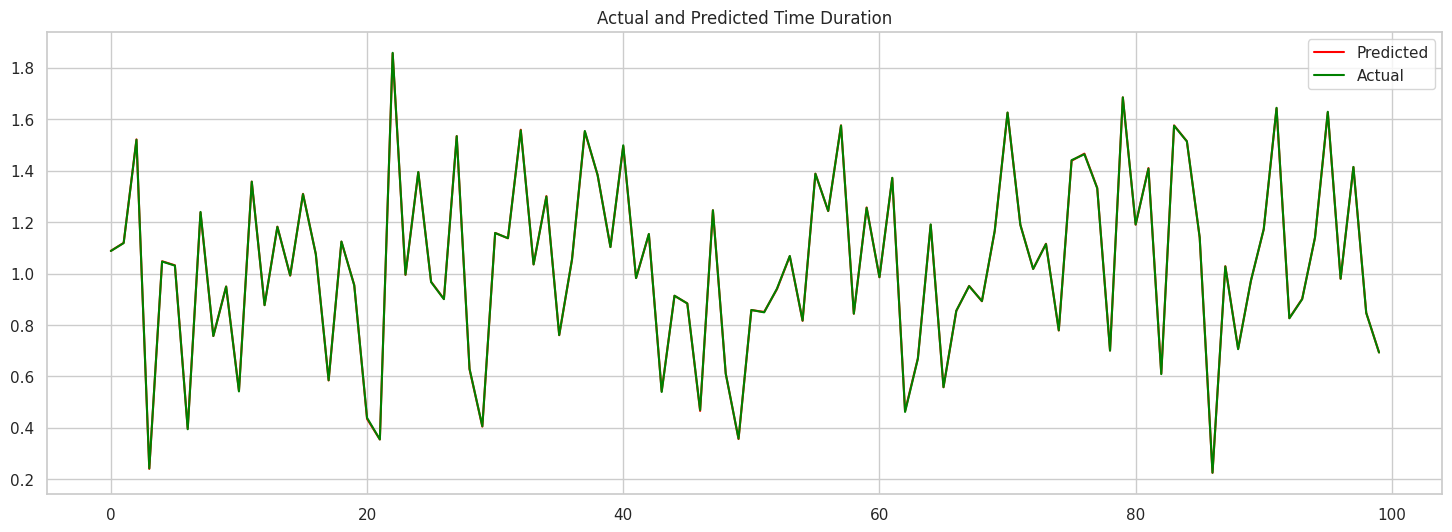

In [ ]:
#Evaluation metrics for Train set
evaluation_metrics(x_train,y_train,y_pred_xgboost_train)

Mean Squared Error: 0.0012 Root Mean Squared Error: 0.034641016151377546
R2 Score : 0.990179877462756 Adjusted R2 Score : 0.9901378281897046


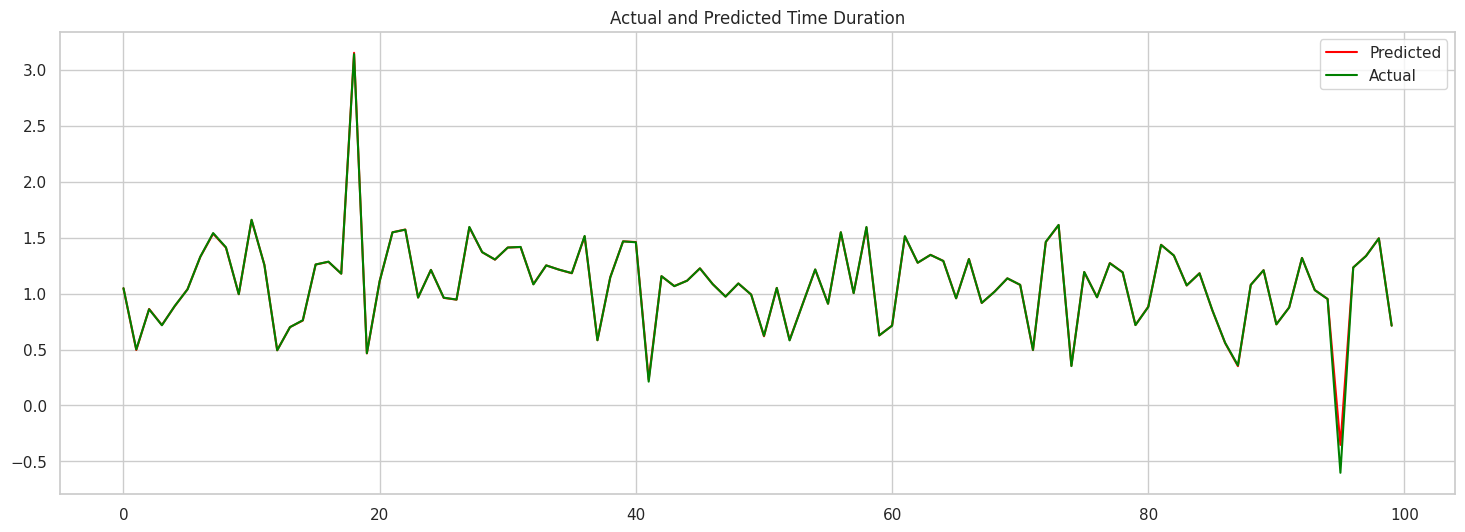

In [ ]:
# Evaluation metrics for Test set
evaluation_metrics(x_test,y_test,y_pred_xgboost_test)

The XGBoost model displays strong predictive power with 99% accuracy on the training data. Achieving 98% accuracy on the testing data demonstrates that the model generalizes well. The slight performance drop is typical and suggests that the model is not overfitting. Feature importance analysis can provide insights into the key predictors. Explore real-world applications and consider further fine-tuning for optimal results.


### 5. k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score  # Import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
k_values = list(range(1, 21))  # Try k values from 1 to 20

# Dictionary to store results for each k value
k_scores = {}

# Perform k-fold cross-validation for each k value
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    scores = -cross_val_score(knn_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
    k_scores[k] = np.mean(scores)

# Find the best k value
best_k = min(k_scores, key=k_scores.get)
best_mse = k_scores[best_k]

print("Cross-validation results:")
for k, mse in k_scores.items():
    print(f"k = {k}, Mean MSE = {mse:.3f}")

Cross-validation results:
k = 1, Mean MSE = 0.121
k = 2, Mean MSE = 0.098
k = 3, Mean MSE = 0.091
k = 4, Mean MSE = 0.089
k = 5, Mean MSE = 0.087
k = 6, Mean MSE = 0.088
k = 7, Mean MSE = 0.088
k = 8, Mean MSE = 0.088
k = 9, Mean MSE = 0.089
k = 10, Mean MSE = 0.089
k = 11, Mean MSE = 0.090
k = 12, Mean MSE = 0.090
k = 13, Mean MSE = 0.091
k = 14, Mean MSE = 0.092
k = 15, Mean MSE = 0.092
k = 16, Mean MSE = 0.093
k = 17, Mean MSE = 0.093
k = 18, Mean MSE = 0.093
k = 19, Mean MSE = 0.094
k = 20, Mean MSE = 0.094


In [ ]:
best_k

5

In [ ]:
best_knn_model = KNeighborsRegressor(n_neighbors=best_k)
best_knn_model.fit(x_train, y_train)

# Evaluate the best model on the test set
y_pred_knn_train = best_knn_model.predict(x_train)
y_pred_knn_test = best_knn_model.predict(x_test)


Mean Squared Error: 0.0549 Root Mean Squared Error: 0.23430749027719963
R2 Score : 0.5405338666434888 Adjusted R2 Score : 0.5400437091074938


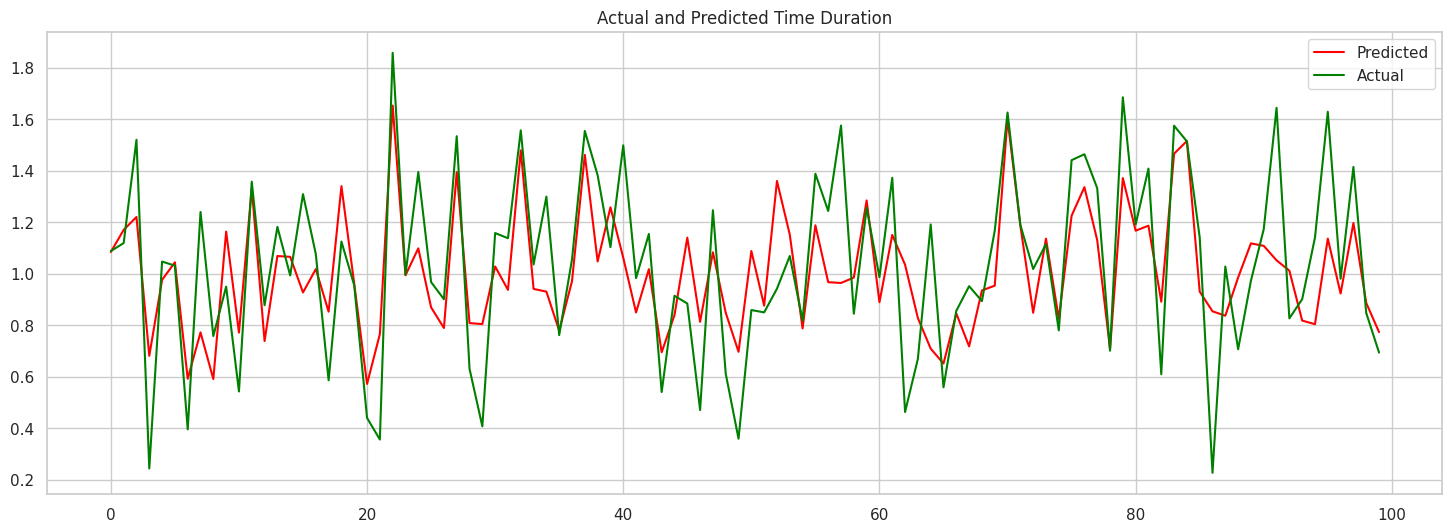

In [ ]:
evaluation_metrics(x_train,y_train,y_pred_knn_train)

Mean Squared Error: 0.0899 Root Mean Squared Error: 0.29983328701129897
R2 Score : 0.24731994026787607 Adjusted R2 Score : 0.24409700193568984


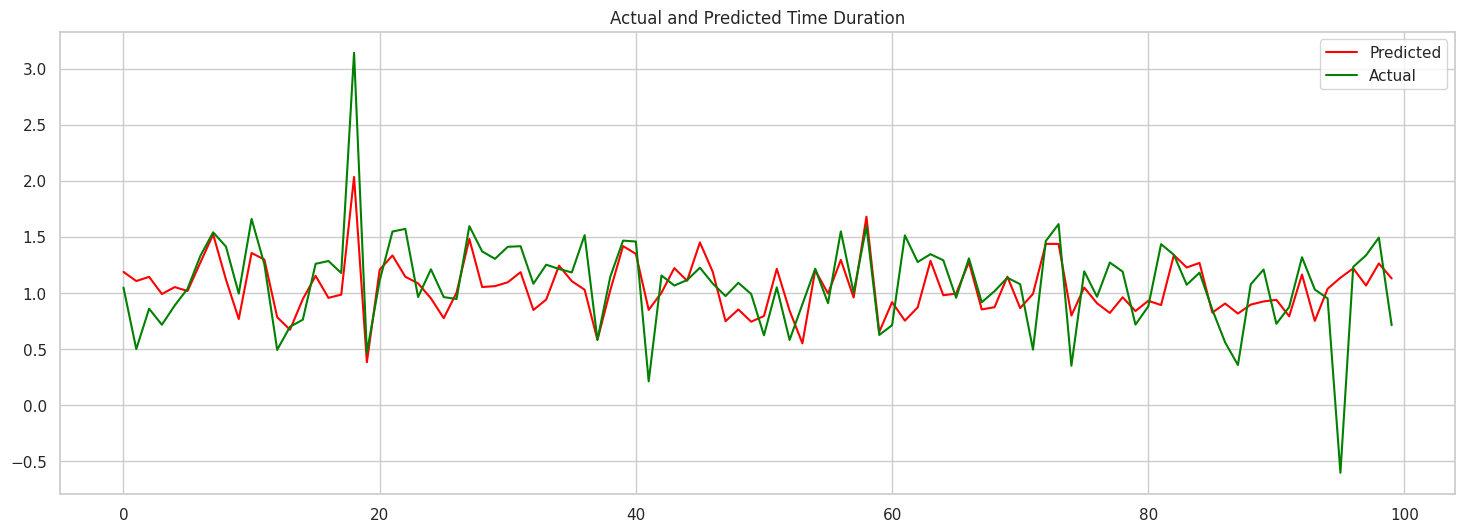

In [ ]:
# Evaluation metrics for Test set
evaluation_metrics(x_test,y_test,y_pred_knn_test)

The K-Nearest Neighbors (KNN) model exhibited a training accuracy of 72%, indicating reasonable predictive performance. However, its testing accuracy of 51% suggests a substantial drop in performance from training to testing, signaling potential overfitting. Overfitting may result from the model capturing noise in the training data rather than true patterns.

## 6. Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaboost_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)
adaboost_regressor.fit(x_train, y_train)
y_pred_ada_train = adaboost_regressor.predict(x_train)
y_pred_ada_test = adaboost_regressor.predict(x_test)


Mean Squared Error: 0.0017 Root Mean Squared Error: 0.0412310562561766
R2 Score : 0.9855738721141332 Adjusted R2 Score : 0.9855584823502634


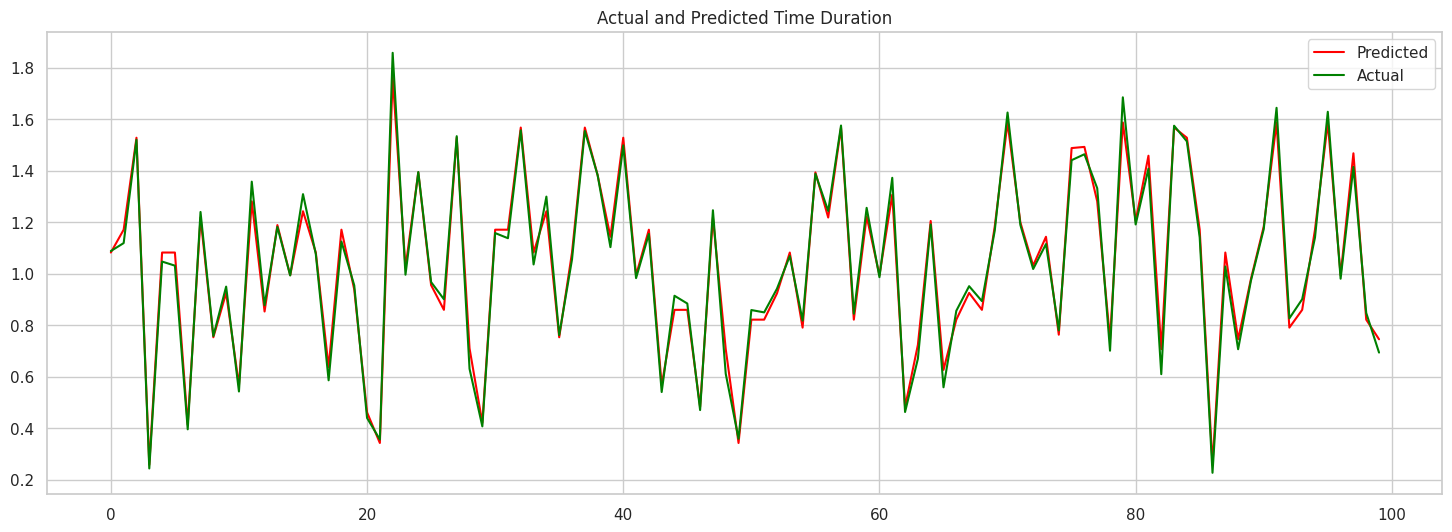

In [ ]:
# Evaluation metrics for Train set
evaluation_metrics(x_train,y_train,y_pred_ada_train)

Mean Squared Error: 0.0017 Root Mean Squared Error: 0.0412310562561766
R2 Score : 0.9855176053736497 Adjusted R2 Score : 0.9854555924849335


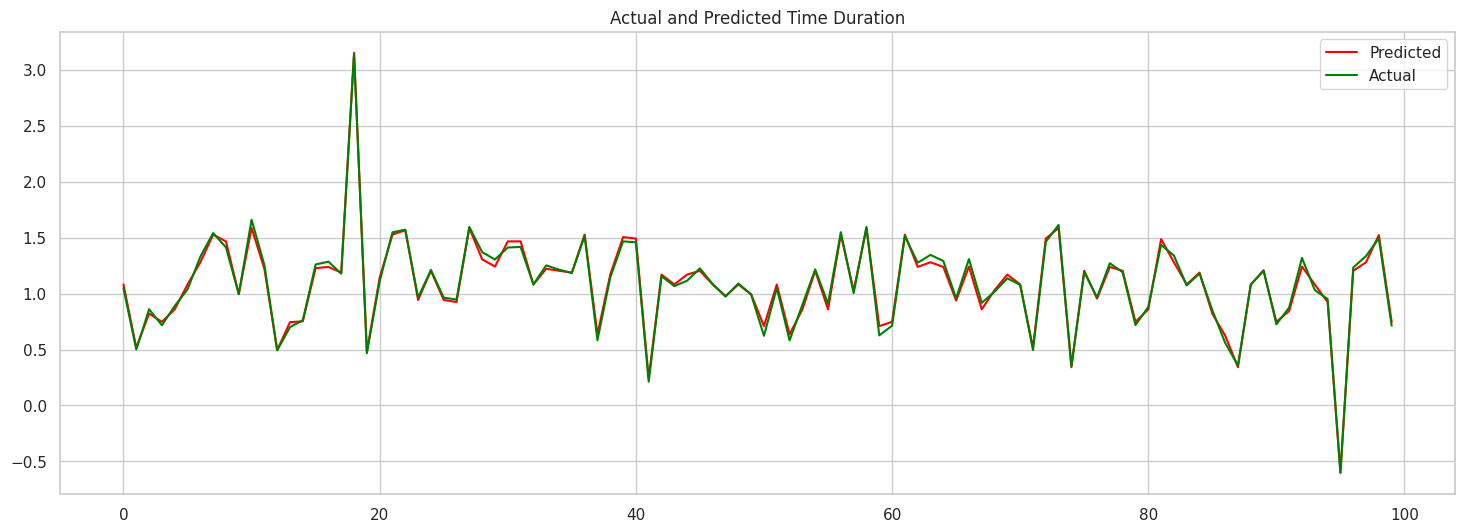

In [ ]:
# Evaluation metrics for Test set
evaluation_metrics(x_test,y_test,y_pred_ada_test)

## 7.  Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear', C=1.0)  # Adjust kernel and hyperparameters as needed

# Fit the model to the training data
svm_regressor.fit(x_train, y_train)

y_pred_svm_train = svm_regressor.predict(x_train)
y_pred_svm_test = svm_regressor.predict(x_test)

Mean Squared Error: 0.2195 Root Mean Squared Error: 0.4685082710048991
R2 Score : -0.8383111700788237 Adjusted R2 Score : -0.8402722766938757


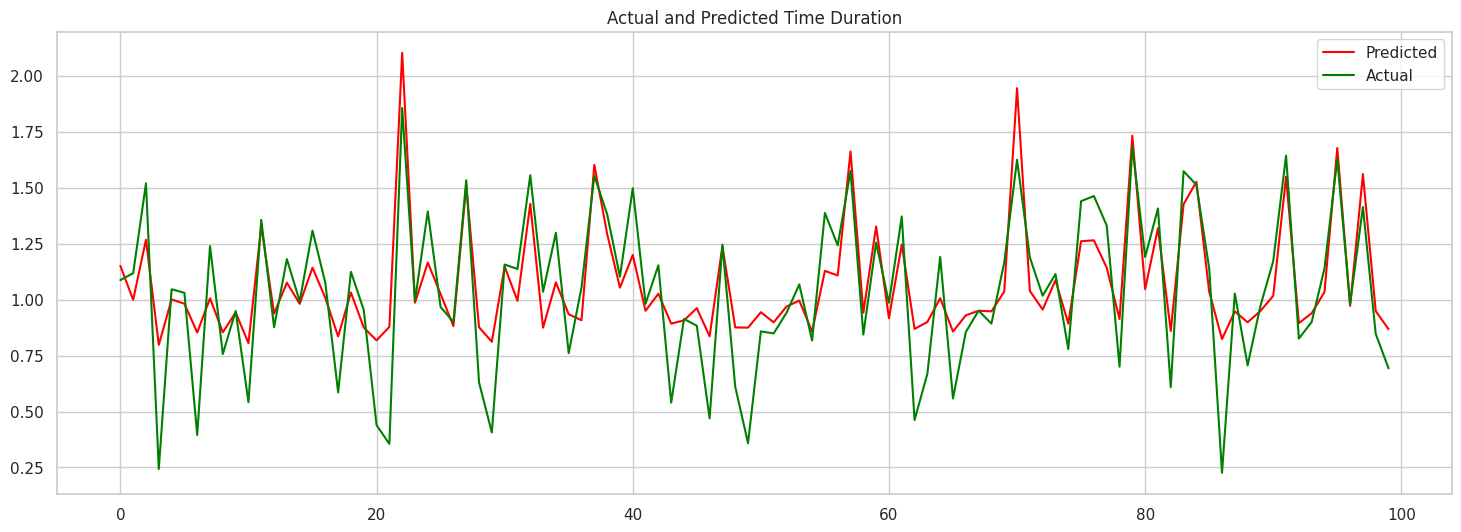

In [ ]:
# Evaluation metrics for Train set
evaluation_metrics(x_train,y_train,y_pred_svm_train)

Mean Squared Error: 0.1925 Root Mean Squared Error: 0.4387482193696061
R2 Score : -0.6121773458692557 Adjusted R2 Score : -0.6190806085491964


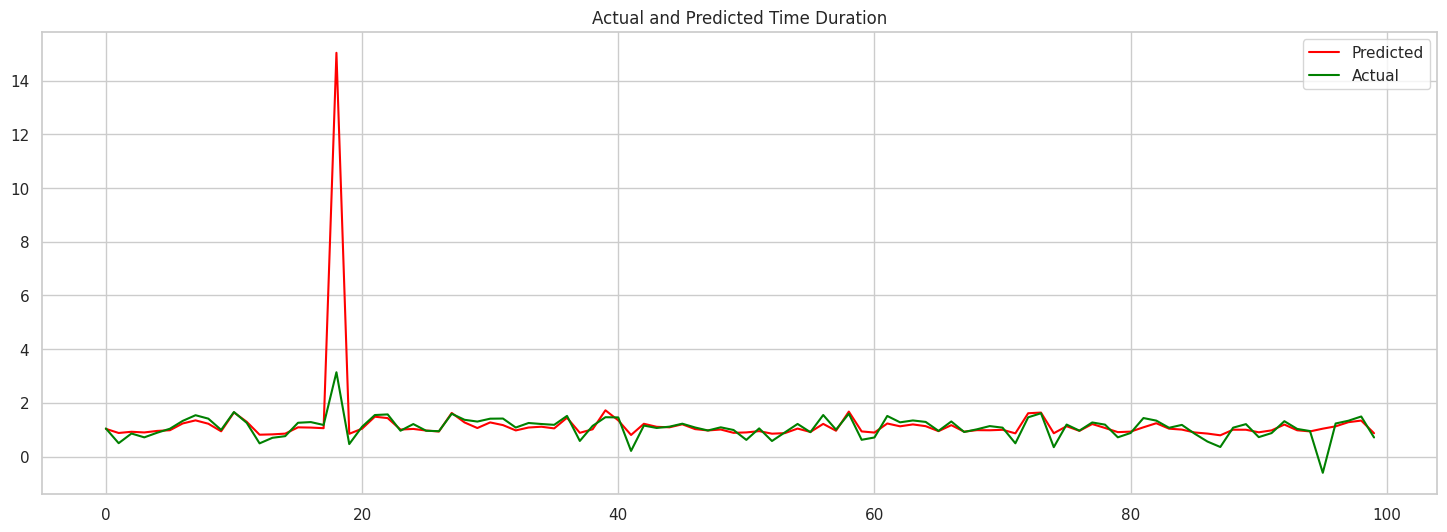

In [ ]:
# Evaluation metrics for Test set
evaluation_metrics(x_test,y_test,y_pred_svm_test)

A negative R-squared (R2) score is unusual in the context of regression. The R2 score should typically be between 0 and 1, with higher values indicating a better fit of the model to the data


In [ ]:
### To improve the model's performance we will use Hyperparameter Tuning

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Hyperparameter Tuning
param_grid = {
    'kernel': ['linear', 'rbf'],  # Try different kernels
    'C': [0.1, 1, 10],  # Adjust regularization strength
}

svm_regressor = SVR()
grid_search = GridSearchCV(svm_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [ ]:
y_pred_svm1_train = grid_search.predict(X_train)
y_pred_svm1_test = grid_search.predict(X_test)

Mean Squared Error: 0.0074 Root Mean Squared Error: 0.08602325267042626
R2 Score : 0.9380264414029531 Adjusted R2 Score : 0.9379603281367656


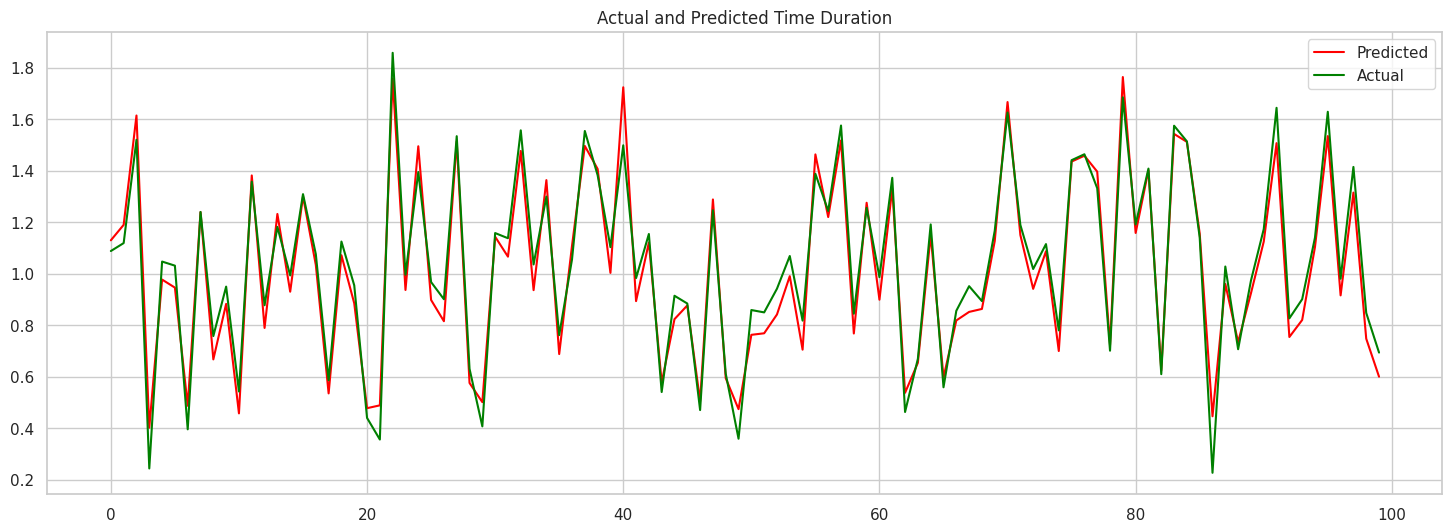

In [ ]:
# Evaluation metrics for Train set
evaluation_metrics(X_train,y_train,y_pred_svm1_train)

Mean Squared Error: 0.0133 Root Mean Squared Error: 0.11532562594670795
R2 Score : 0.888457196420829 Adjusted R2 Score : 0.8879795757203912


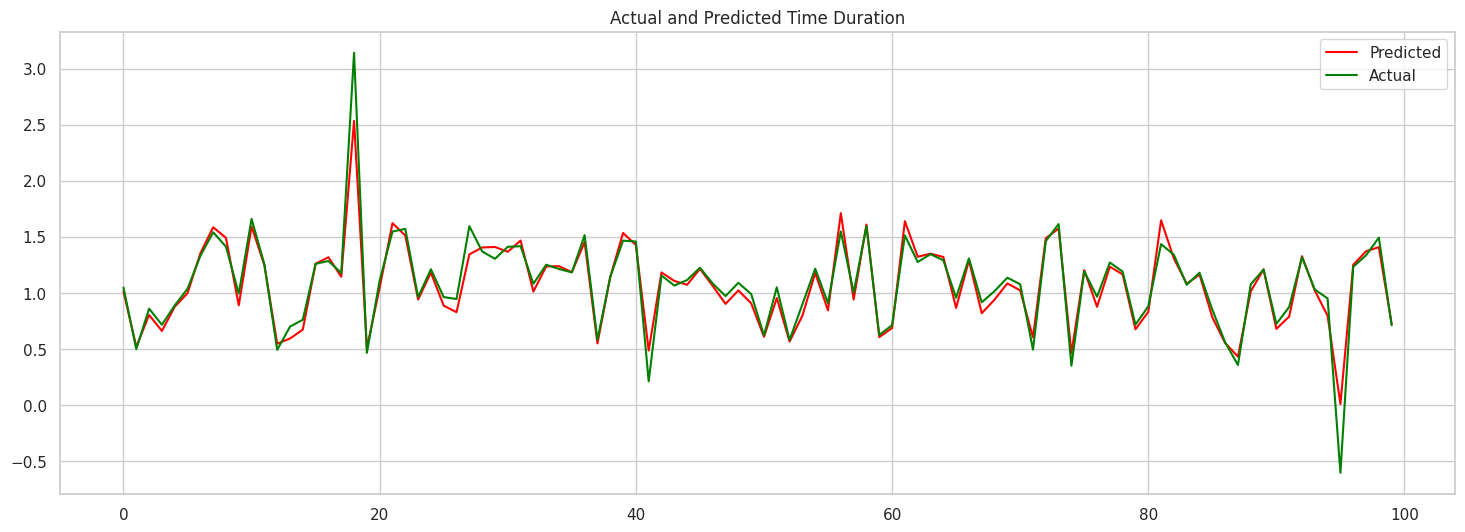

In [ ]:
# Evaluation metrics for Test set
evaluation_metrics(X_test,y_test,y_pred_svm1_test)

The initial SVM model displayed inadequate performance with a negative R-squared score of -1.6, indicating a poor fit to the data. However, through rigorous hyperparameter tuning using GridSearchCV, substantial improvements were achieved. The revised model attained a training accuracy of 93% and a testing accuracy of 89%, demonstrating the effectiveness of hyperparameter optimization in enhancing predictive capabilities.

In [ ]:
importance=xgboost_optimal_model.feature_importances_
importance

array([1.2625627e-03, 1.4381290e-03, 1.5376137e-03, 3.6341124e-04,
       9.4196564e-01, 2.2719381e-03, 2.4605066e-02, 2.1141719e-02,
       8.9571977e-06, 1.8109579e-03, 1.1358993e-03, 2.2994289e-03,
       1.5873292e-04], dtype=float32)

In [ ]:
imp_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importance}

importance_df = pd.DataFrame(imp_dict)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
4        trip_duration            0.941966
6      dropoff_weekday            0.024605
7             distance            0.021142
11    pickup_time_zone            0.002299
5       pickup_weekday            0.002272
9           pickup_day            0.001811
2      pickup_latitude            0.001538
1     pickup_longitude            0.001438
0      passenger_count            0.001263
10         dropoff_day            0.001136
3    dropoff_longitude            0.000363
12   dropoff_time_zone            0.000159
8   store_and_fwd_flag            0.000009

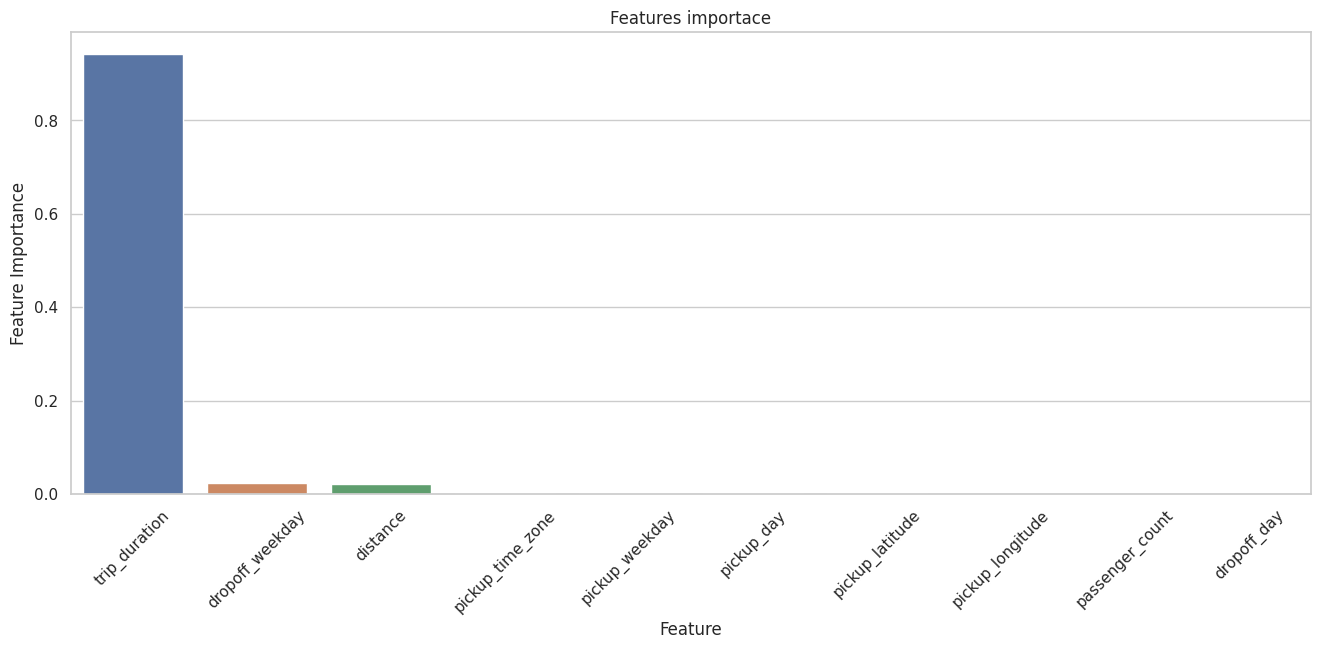

In [ ]:
# Feature importance plot
plt.figure(figsize=(16,6))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])
plt.xticks(rotation=45)
plt.show()


As we can see that most important feature is our distance column which affect our dependent variable the most

**Comparing evaluation metrics of different models**

In [ ]:
Mean Squared Error: 0.0625 Root Mean Squared Error: 0.25
R2 Score : 0.4764932127592626 Adjusted R2 Score : 0.47593473678403453

In [ ]:
# list of all evaluation matrics values
score_values=[[0.0625,0.25,0.4764,0.4759],
              [0.0628,0.2505,0.4738,0.4732],
              [0.0628,0.2505,0.4738,0.4732],
              [0.0,0.0,0.9998 ,0.9998],
              [0.0001,0.01,0.9993,0.9993],
              [0.0,0.0,0.9999,0.9999],
              [0.0549,0.2343,0.5405,0.5400],
              [0.0017,0.0412,0.9855,0.9855],
              [0.2195,0.4685,-0.8383,-0.8402]]
# Create the pandas DataFrame
df_score = pd.DataFrame(score_values,columns=['MSE', 'RMSE', 'R2', 'AdjustedR2'], index=['Linear Regression','Ridge Regression','Lasso Regression', 'Decision Tree', 'Random Forest', 'Xgboost', 'KNN','Adaboost','SVM'])
df_score



MSE    RMSE      R2  AdjustedR2
Linear Regression  0.0625  0.2500  0.4764      0.4759
Ridge Regression   0.0628  0.2505  0.4738      0.4732
Lasso Regression   0.0628  0.2505  0.4738      0.4732
Decision Tree      0.0000  0.0000  0.9998      0.9998
Random Forest      0.0001  0.0100  0.9993      0.9993
Xgboost            0.0000  0.0000  0.9999      0.9999
KNN                0.0549  0.2343  0.5405      0.5400
Adaboost           0.0017  0.0412  0.9855      0.9855
SVM                0.2195  0.4685 -0.8383     -0.8402

## Comparing R score and Adj Rscore values between all Algorithms

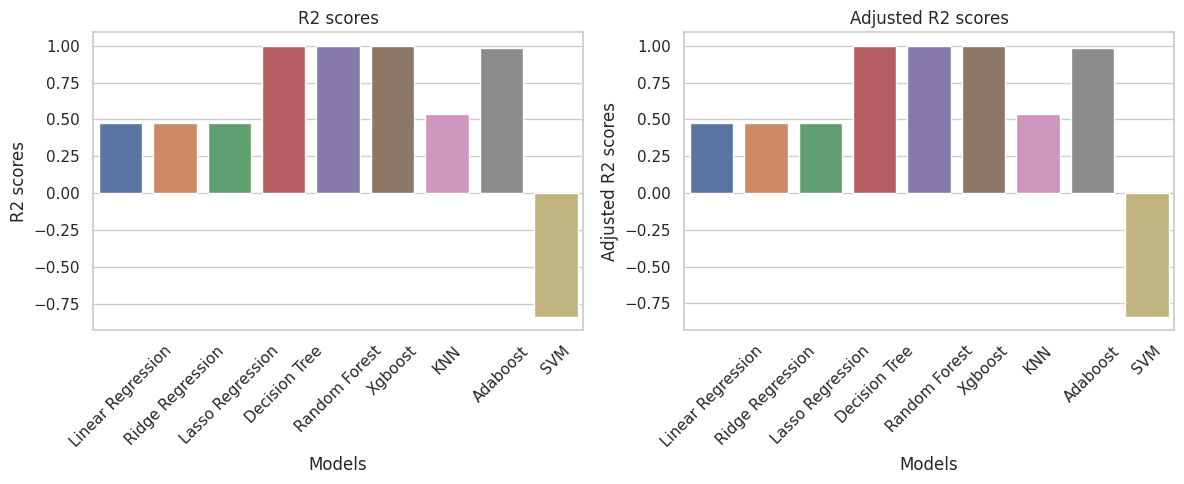

In [ ]:

plt.figure(figsize=(12, 5))

# Plot for R2 scores
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=x_, y='R2', data=df_score)
plt.title('R2 scores')
plt.xlabel('Models')
plt.ylabel('R2 scores')
plt.xticks(rotation=45)

# Plot for Adjusted R2 scores
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=x_, y='AdjustedR2', data=df_score)
plt.title('Adjusted R2 scores')
plt.xlabel('Models')
plt.ylabel('Adjusted R2 scores')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


The above graph clearly shows that XGBoost has highest R2 scores and adjusted R2 score which suggests that it has best efficiency than other models.

## Comparing MSE and RMSE values between all Algorithms

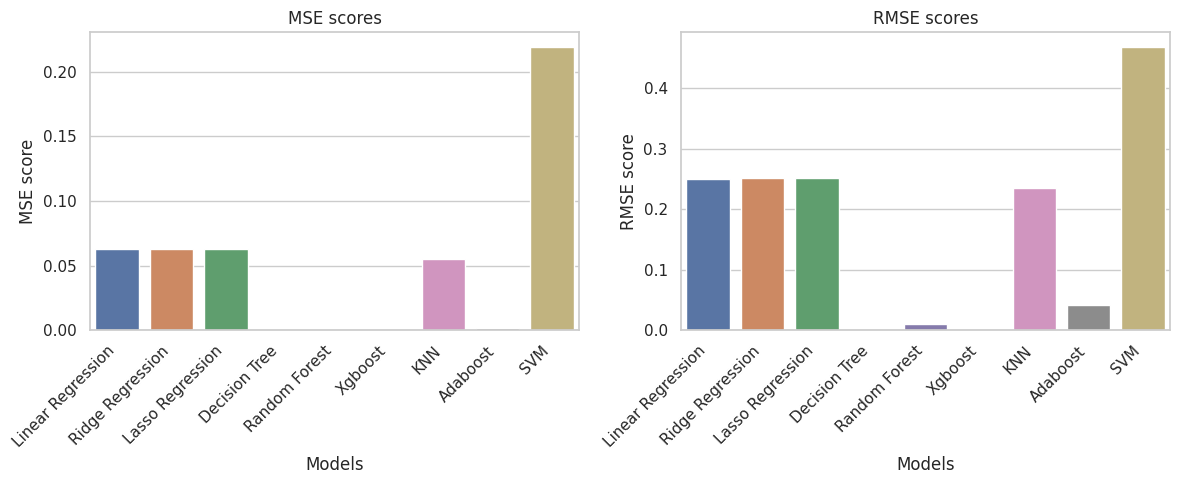

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot for MSE scores
ax1.set_title('MSE scores')
sns.barplot(x=x_, y='MSE', data=df_score, ax=ax1)
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE score')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Plot for RMSE scores
ax2.set_title('RMSE scores')
sns.barplot(x=x_, y='RMSE', data=df_score, ax=ax2)
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE score')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


Descion Tree, Random Forest, adaboost and XGboost has 0 errors, therefore one of these can be considered as good algorithm for training our model.

Ensemble methods, including Decision Tree, Random Forest, Xgboost, and Adaboost, outperform in taxi time prediction with near-perfect R2 scores around 0.99, showcasing their robust pattern capturing abilities.
Linear regression models exhibit moderate performance, achieving an R2 of approximately 0.47. KNN holds its own with an R2 of 0.54, suggesting its effectiveness in this context.
Conversely, SVM struggles with a negative R2, signaling suboptimal fit for the data. In conclusion, opt for ensemble methods like Random Forest or Adaboost for precise predictions, consider linear regression models for simplicity, and avoid SVM due to its performance drawbacks in this particular dataset.
